# Regressão Linear e Regularização (Ari)

## 1. Provando que:

$$

\begin{array}{c}

    \Large \textrm{Se:} \quad \frac{d}{d \mathbf{w}} (\mathbf{a}^T\mathbf{a}) = 2\mathbf{a}^T \frac{d\mathbf{a}}{d\mathbf{w}} \\ \\ \\

    \Large \textrm{Seja:} \quad \mathbf{a} = \mathbf{X}\mathbf{w} - \mathbf{y} \\ \\ \\

    \Large \textrm{E considerando que:} \quad J(\mathbf{w}) = \frac{1}{m}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|^2 =\frac{1}{m} (\mathbf{X}\mathbf{w} - \mathbf{y})^T(\mathbf{X}\mathbf{w} - \mathbf{y}) \\ \\ \\

    \Large \textrm{Então:} \quad \nabla J(\mathbf{w}) = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y}) \\ \\ \\

\end{array}

$$

### 1.1. Teoria

$$

\begin{array}{c}

    \Large \textrm{Seja:} \quad v = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} \in \mathbb{R}^n \\ \\ \\

    \Large \textrm{A \textbf{norma euclidiana} de } v \textrm{ é definida como:} \quad \| v \| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2} \\ \\ \\

    \Large \textrm{Logo:} \quad \| v \|^2 = v_1^2 + v_2^2 + \cdots + v_n^2 \\ \\ \\

    \Large \textrm{O \textbf{produto interno padrão} (também chamado de produto escalar de) } v \textrm{ consigo mesmo é:} \\ \\ \\

    \Large v^Tv = v_1^2 + v_2^2 + \cdots + v_n^2 = \| v \|^2 \\ \\ \\

    \Large \textrm{Visto que:} \quad v^Tv = [v_1 \ \ v_2 \ \ \cdots \ \ v_n] \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} = v_1^2 + v_2^2 + \cdots + v_n^2\ \ \\ \\

    \Large \textrm{Com isso:} \quad J(\mathbf{w}) = \frac{1}{m}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|^2 = \frac{1}{m} (\mathbf{X}\mathbf{w} - \mathbf{y})^T(\mathbf{X}\mathbf{w} - \mathbf{y})  \\ \\ \\

    \Large \textrm{Expandindo os termos:} \quad J(\mathbf{w}) = \frac{1}{m} (\mathbf{X}\mathbf{w} - \mathbf{y})^T(\mathbf{X}\mathbf{w} - \mathbf{y}) = \frac{1}{m} (\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - 2y^T \mathbf{X} \mathbf{w} + \mathbf{y}^T\mathbf{y}) \\ \\ \\

\end{array}

$$

### 1.2. Provando a expansão dos termos

In [ ]:
# Criação de símbolos e variáveis matemáticas
import sympy as sp

# Cálculo de matrizes
import numpy as np

# Apresentação fórmulas matemáticas no formato LaTeX
from IPython.display import display, Math

# Definição de um estado de aleatoriedade, para o experimento sempre ser igual
np.random.seed(seed = 12)

# Define a quantidade de linhas e colunas da matriz de projeto
m, n = (8, 3)

# Cria uma matriz de projeto aleatória
X = sp.Matrix(np.random.randint(1, 9, (m, n)))

# Cria um vetor de rótulos aleatório
y = sp.Matrix(np.random.randint(1, 9, (m, 1)))

# Cria variáveis simbólicas para o vetor w
w = sp.Matrix(sp.symbols('w0:%d' % n))

![](images\imagem_1.png)

#### 1.2.1. Provando o primeiro termo

In [228]:
display(Math(r"(\mathbf{X} \mathbf{w})^T"))
display((X @ w).T)

print("")

display(Math(r"\mathbf{w}^T \mathbf{X}^T"))
display(w.T @ X.T)

<IPython.core.display.Math object>

Matrix([[4*w0 + 4*w1 + 7*w2, 6*w0 + 2*w1 + 3*w2, 4*w0 + 4*w1 + 5*w2, w0 + 7*w1 + 2*w2, 5*w0 + 6*w1 + 6*w2, 2*w0 + 3*w1 + 4*w2, 7*w0 + 3*w1 + w2, 6*w0 + w1 + 5*w2]])

<IPython.core.display.Math object>

Matrix([[4*w0 + 4*w1 + 7*w2, 6*w0 + 2*w1 + 3*w2, 4*w0 + 4*w1 + 5*w2, w0 + 7*w1 + 2*w2, 5*w0 + 6*w1 + 6*w2, 2*w0 + 3*w1 + 4*w2, 7*w0 + 3*w1 + w2, 6*w0 + w1 + 5*w2]])

#### 1.2.2. Provando o segundo termo

In [231]:
display(-y.T @ (X @ w))

display((-(X @ w).T) @ y)

Matrix([[-139*w0 - 137*w1 - 145*w2]])

Matrix([[-139*w0 - 137*w1 - 145*w2]])

### 1.3. Provando que:

> 1º termo

$$

\begin{array}{c}

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{w}^T A \mathbf{w}) = 2A\mathbf{w} \quad \textrm{(Se A é simétrica)} \\ \\ \\

    \Large \textrm{Já que} \ \ A = \mathbf{X}^T \mathbf{X} \textrm{, então A será simétrica} \\ \\ \\

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{w}^T\mathbf{X}^T \mathbf{X}\mathbf{w}) = 2\mathbf{X}^T \mathbf{X}\mathbf{w} \\ \\ \\

\end{array}

$$

---

> 2º termo

$$

\begin{array}{c}

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{c}^T \mathbf{w}) = \mathbf{c} \\ \\ \\

    \Large \frac{\partial}{\partial \mathbf{w}} (-2\mathbf{y}^T \mathbf{X}\mathbf{w}) = -2\mathbf{X}^T\mathbf{y} \\ \\ \\

\end{array}

$$

---

> 3º termo

$$

\begin{array}{c}

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{y}^T \mathbf{y}) = 0 \\ \\ \\

\end{array}

$$

#### 1.3.1.

> 1º termo

$$

\begin{array}{c}

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{w}^T A \mathbf{w}) = 2A\mathbf{w} \quad \textrm{(Se A é simétrica)} \\ \\ \\

    \Large \textrm{Já que} \ \ A = \mathbf{X}^T \mathbf{X} \textrm{, então A será simétrica} \\ \\ \\

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{w}^T\mathbf{X}^T \mathbf{X}\mathbf{w}) = 2\mathbf{X}^T \mathbf{X}\mathbf{w} \\ \\ \\

\end{array}

$$

In [287]:
# Criação de símbolos e variáveis matemáticas
import sympy as sp

# Cálculo de matrizes
import numpy as np

# Apresentação fórmulas matemáticas no formato LaTeX
from IPython.display import display, Math, Markdown

# Definição de um estado de aleatoriedade, para o experimento sempre ser igual
np.random.seed(seed = 12)

# Define a quantidade de linhas e colunas da matriz de projeto
m, n = (8, 3)

# Cria uma matriz de projeto aleatória
X = sp.Matrix(np.random.randint(1, 9, (m, n)))

# Cria um vetor de rótulos aleatório
y = sp.Matrix(np.random.randint(1, 9, (m, 1)))

# Cria variáveis simbólicas para o vetor w
w = sp.Matrix(sp.symbols('w0:%d' % n))

# Criar uma matriz simétrica A
A = sp.Matrix(X.T @ X)  # A == A.T

# Expressão escalar: w^T * A * w
expr = (w.T * A * w)[0]

# Derivada de expr em relação a cada wi (gradiente ∇)
grad = sp.Matrix([sp.diff(expr, wi) for wi in w])

# Verificação: 2 * A * w
expected = 2 * A * w

#==================================================================================

display(Math(r"\mathbf{X}"))
display(X)

display(Markdown("---"))
display(Math(r"A = \mathbf{X}^T\mathbf{X}"))
display(A)

display(Markdown("---"))
display(Math(r"\mathbf{w}"))
display(w)

display(Markdown("---"))
display(Math(r"\mathbf{w}^T A"))
display((w.T * A))

display(Markdown("---"))
display(Math(r"\mathbf{w}^T A \mathbf{w}"))
display(expr)

display(Markdown("---"))
display(Math(r"\frac{d}{d \mathbf{w}} (\mathbf{w}^T A \mathbf{w}) = \frac{d}{d \mathbf{w}} (\mathbf{w}^T\mathbf{X}^T \mathbf{X}\mathbf{w})"))
display(grad)

display(Markdown("---"))
display(Math(r"2A\mathbf{w} = 2 \mathbf{X}^T \mathbf{X}\mathbf{w}"))
display(2 * A @ w)

<IPython.core.display.Math object>

Matrix([
[4, 4, 7],
[6, 2, 3],
[4, 4, 5],
[1, 7, 2],
[5, 6, 6],
[2, 3, 4],
[7, 3, 1],
[6, 1, 5]])

---

<IPython.core.display.Math object>

Matrix([
[183, 114, 143],
[114, 140, 124],
[143, 124, 165]])

---

<IPython.core.display.Math object>

Matrix([
[w0],
[w1],
[w2]])

---

<IPython.core.display.Math object>

Matrix([[183*w0 + 114*w1 + 143*w2, 114*w0 + 140*w1 + 124*w2, 143*w0 + 124*w1 + 165*w2]])

---

<IPython.core.display.Math object>

w0*(183*w0 + 114*w1 + 143*w2) + w1*(114*w0 + 140*w1 + 124*w2) + w2*(143*w0 + 124*w1 + 165*w2)

---

<IPython.core.display.Math object>

Matrix([
[366*w0 + 228*w1 + 286*w2],
[228*w0 + 280*w1 + 248*w2],
[286*w0 + 248*w1 + 330*w2]])

---

<IPython.core.display.Math object>

Matrix([
[366*w0 + 228*w1 + 286*w2],
[228*w0 + 280*w1 + 248*w2],
[286*w0 + 248*w1 + 330*w2]])

#### 1.3.2. Provando que

> 2º termo

$$

\begin{array}{c}

    \Large \frac{\partial}{\partial \mathbf{w}} (\mathbf{c}^T \mathbf{w}) = \mathbf{c} \\ \\ \\

    \Large \mathbf{y}^T\mathbf{X}\mathbf{w} = (\mathbf{X}^T \mathbf{y})^T \mathbf{w} \\ \\ \\

    \Large \textrm{Onde:} \quad \mathbf{c} = \mathbf{X}^T \mathbf{y} \rightarrow \mathbf{y}^T \mathbf{X}\mathbf{w} = \mathbf{c}^T \mathbf{w} \\ \\ \\

    \Large \frac{\partial}{\partial \mathbf{w}} (-2\mathbf{y}^T \mathbf{X}\mathbf{w}) = -2\mathbf{X}^T\mathbf{y} \\ \\ \\

\end{array}

$$

In [285]:
# Criação de símbolos e variáveis matemáticas
import sympy as sp

# Cálculo de matrizes
import numpy as np

# Apresentação fórmulas matemáticas no formato LaTeX
from IPython.display import display, Math, Markdown

# Número de variáveis
n = 4

# Definindo os vetores simbólicos c e w
w = sp.Matrix(sp.symbols('w0:%d' % n))
c = sp.Matrix(sp.symbols('c0:%d' % n))

# Produto escalar c^T * w
dot_product = (c.T * w)[0]

# Cálculo do gradiente em relação a w
grad = sp.Matrix([sp.diff(dot_product, wi) for wi in w])

#==================================================================================

display(Math(r"c^T"))
display(c.T)

display(Markdown("---"))
display(Math(r"\mathbf{w}"))
display(w)

display(Markdown("---"))
display(Math(r"c^T \mathbf{w}"))
display(dot_product)

display(Markdown("---"))
display(Math(r"\frac{d}{d \mathbf{w}} (c^T \mathbf{w})"))
display(grad)

<IPython.core.display.Math object>

Matrix([[c0, c1, c2, c3]])

---

<IPython.core.display.Math object>

Matrix([
[w0],
[w1],
[w2],
[w3]])

---

<IPython.core.display.Math object>

c0*w0 + c1*w1 + c2*w2 + c3*w3

---

<IPython.core.display.Math object>

Matrix([
[c0],
[c1],
[c2],
[c3]])

In [286]:
# Definição de um estado de aleatoriedade, para o experimento sempre ser igual
np.random.seed(seed = 12)

# Define a quantidade de linhas e colunas da matriz de projeto
m, n = (8, 3)

# Cria uma matriz de projeto aleatória
X = sp.Matrix(np.random.randint(1, 9, (m, n)))

# Cria um vetor de rótulos aleatório
y = sp.Matrix(np.random.randint(1, 9, (m, 1)))

# Cria variáveis simbólicas para o vetor w
w = sp.Matrix(sp.symbols('w0:%d' % n))

#==================================================================================

display(Math(r"\mathbf{y}^T \mathbf{X} \mathbf{w}"))
display(y.T @ X @ w)

display(Markdown("---"))
display(Math(r"(\mathbf{X}^T \mathbf{y})^T \mathbf{w}"))
display((X.T @ y).T @ w)

<IPython.core.display.Math object>

Matrix([[139*w0 + 137*w1 + 145*w2]])

---

<IPython.core.display.Math object>

Matrix([[139*w0 + 137*w1 + 145*w2]])

## 2. Regressão linear simples

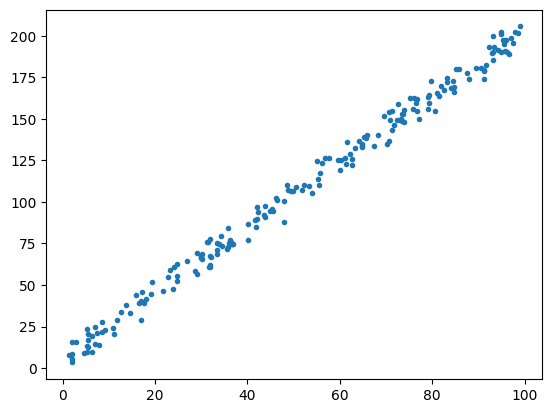

In [309]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o estado de aleatoriedade
np.random.seed(seed = 11)

# Definindo o número de amostras
n = 200

# Definindo as coordenadas dos dados
X = np.random.uniform(0, 100, (n, 1))
y = (X * 2) + np.random.normal(loc = 5, scale = 5, size = (n, 1))

# Apresentação o gráfico
plt.scatter(x = X, y = y, marker = ".")
plt.show()

$\mathbf{w} = \left( \mathbf{X}^T\mathbf{X} \right)^{-1}\mathbf{X}^Ty$

In [310]:
X = np.c_[np.ones_like(a = X), X]
print("X", X.shape, '\n')

w = np.linalg.inv((X.T @ X)) @ X.T @ y
print("w", w.shape, '\n')

for i in range(w.size):
    print(f"w{i}:", np.round(a = w[i][0], decimals = 3))

X (200, 2) 

w (2, 1) 

w0: 6.129
w1: 1.975


In [311]:
# Vetor de predições
y_pred = X @ w
print(y_pred)

[[ 41.72802217]
 [  9.97477679]
 [ 97.60398068]
 [149.28681884]
 [ 89.10951216]
 [101.98966835]
 [  8.65277977]
 [102.37366467]
 [192.11424793]
 [174.14153471]
 [150.28023625]
 [ 27.60176016]
 [182.65459748]
 [175.39732368]
 [ 38.729711  ]
 [131.00044215]
 [ 10.17390718]
 [ 29.18181452]
 [ 68.60420652]
 [ 37.3129478 ]
 [156.01006197]
 [167.71962754]
 [ 74.1843566 ]
 [ 69.08436954]
 [ 28.17941274]
 [ 22.70769557]
 [146.87601785]
 [124.52504114]
 [ 17.12314482]
 [100.87790766]
 [ 85.45082666]
 [173.58542063]
 [147.88774192]
 [125.02281316]
 [115.21209798]
 [193.55499168]
 [200.97439615]
 [ 72.88684392]
 [ 53.49865175]
 [163.40680261]
 [ 18.70548089]
 [ 78.13215434]
 [ 19.95677018]
 [ 69.19671636]
 [ 20.02782102]
 [ 63.44933058]
 [162.15585718]
 [184.92482568]
 [162.65355153]
 [117.07527385]
 [127.77847664]
 [ 77.51363569]
 [ 39.46643562]
 [ 92.27651982]
 [150.84519223]
 [ 18.5477347 ]
 [ 10.22315131]
 [158.29457324]
 [ 65.36255777]
 [144.59285289]
 [151.20902126]
 [190.35630048]
 [ 85.18

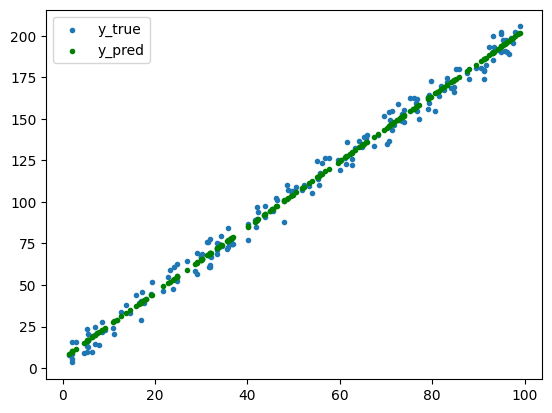

In [314]:
plt.scatter(x = X[:, 1], y = y, marker = ".", label = "y_true")
plt.scatter(x = X[:, 1], y = y_pred, marker = ".", color = "g", label = "y_pred")

plt.legend()
plt.show()

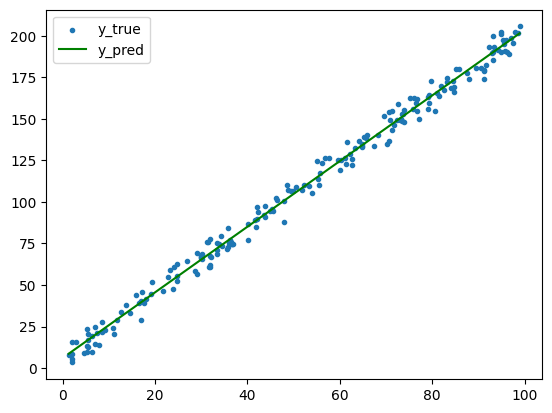

In [318]:
plt.scatter(x = X[:, 1], y = y, marker = ".", label = "y_true")

# Cria uma matriz com as coordenadas x e y
matriz_xy = np.c_[X[:, 1], y_pred]

# Ordena de acordo com o eixo x
matriz_ordenada = matriz_xy[np.argsort(matriz_xy[:, 0])]

plt.plot(matriz_ordenada[:, 0], matriz_ordenada[:, 1], color = "g", label = "y_pred")

plt.legend()
plt.show()

## 3. Observação do erro em relação aos pesos

In [276]:
import numpy as np
import plotly.graph_objects as go

resolucao = 50

# Geração da grade de pesos (w0 e w1)
w0 = np.linspace(-100, 100, resolucao)
w1 = np.linspace(-3, 3, resolucao)
W0, W1 = np.meshgrid(w0, w1)

# Calculando a função de custo J(w0, w1)
Z = np.zeros_like(W0)

# Para cada par (w0, w1), calcula o erro quadrático médio
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w = np.array([W0[i, j], W1[i, j]])
        y_pred = X @ w
        Z[i, j] = np.sum((y_pred - y) ** 2)

# Coordenadas do menor valor
coordenadas = np.unravel_index(np.argmin(Z), Z.shape)

i_min, j_min = coordenadas
x_min = W0[i_min, j_min]
y_min = W1[i_min, j_min]
z_min = Z[i_min, j_min]

# Gráfico 3D da função de custo com ponto mínimo
fig = go.Figure()

# Superfície da função de custo
fig.add_trace(go.Surface(z=Z, x=W0, y=W1, colorscale='Viridis', opacity=0.9))

# Ponto do menor valor
fig.add_trace(go.Scatter3d(
    x=[x_min],
    y=[y_min],
    z=[z_min],
    mode='markers',
    marker=dict(size=6, color='red'),
    name='Mínimo'
))

print("w0", x_min)
print("w1", y_min)
print("Erro", z_min)

fig.update_layout(title='Função de Custo J(w0, w1)',
                  scene=dict(
                      xaxis_title='w0',
                      yaxis_title='w1',
                      zaxis_title='Custo'
                  ))
fig.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

## 4. Observação do erro absoluto e quadrático em relação a média

Encontrando a média ideal para uma função

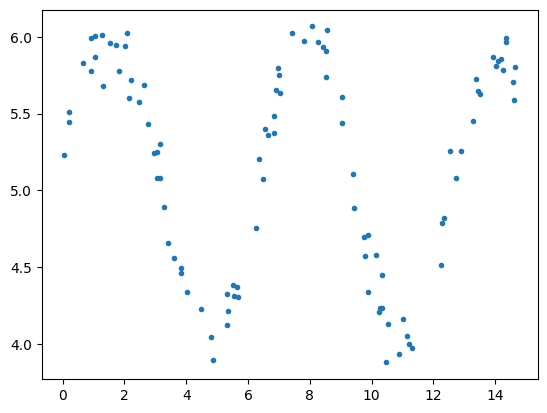

In [ ]:
# Determinando a quantidade de amostras
quantidade_amostras = 100

# Definindo a distribuição dos dados
x = np.random.uniform(low = 0, high = 15, size = quantidade_amostras)
y = (5 + np.sin(x) + np.random.normal(loc = 0, scale = 0.15, size = quantidade_amostras))

# Transformando em vetor coluna
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Apresenta o gráfico
plt.scatter(x = x, y = y, marker = ".")
plt.show()

Calculando os erros para todas as médias em um intervalo

In [142]:
# Determina a faixa de valores para as médias que serão testadas
vetor_w0 = np.linspace(4, 6, 200)

# Vetor que conterá o erro para cada média
matriz_erro = np.zeros(shape = (vetor_w0.shape[0], 3))

# Percorre cada valor e atribui a média
for i, w0 in enumerate(vetor_w0):

    # Cria o vetor de predição que é basicamente a média proposta
    y_pred = np.ones_like(a = y) * w0

    # Calcula o erro absoluto e o quadrático
    erro_absoluto = np.abs(y_pred - y)
    erro_quadratico = np.abs(y_pred - y) ** 2

    # Soma todos os erros
    soma_erro_absoluto = np.sum(a = erro_absoluto)
    soma_erro_quadratico = np.sum(a = erro_quadratico)

    # Adiciona o erro na matriz
    matriz_erro[i][0] = soma_erro_absoluto
    matriz_erro[i][1] = soma_erro_quadratico

Observando o comportamento da soma dos erros duas funções de custo

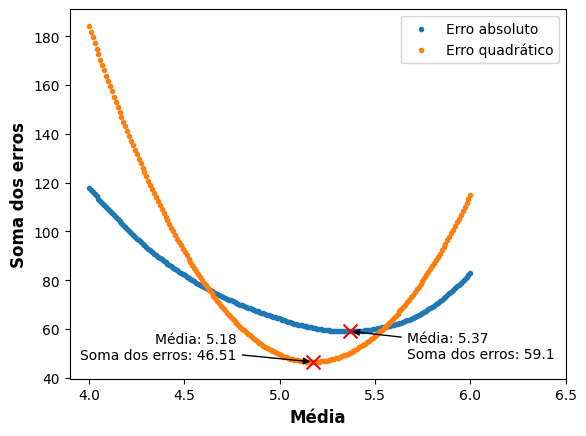

In [156]:
# Criação do gráfico
plt.scatter(x = vetor_w0, y = matriz_erro[:, 0], marker = ".", label = "Erro absoluto")
plt.scatter(x = vetor_w0, y = matriz_erro[:, 1], marker = ".", label = "Erro quadrático")

# Obtendo as coordenadas dos valores mínimos para a função de erro
x_min_absoluto, y_min_absoluto = vetor_w0[np.argmin(a = matriz_erro[:, 0])], np.min(a = matriz_erro[:, 0])
x_min_quadratico, y_min_quadratico = vetor_w0[np.argmin(a = matriz_erro[:, 1])], np.min(a = matriz_erro[:, 1])

# Cria um X no menor valor de cada função
plt.scatter(x = x_min_absoluto, y = y_min_absoluto, marker = "x", color = "r", s = 100)
plt.scatter(x = x_min_quadratico, y = y_min_quadratico, marker = "x", color = "r", s = 100)

# Cria setas e textos indicando onde está o valor mínimo para cada função
plt.annotate(text = f"Média: {np.round(a = x_min_absoluto, decimals = 2)}\nSoma dos erros: {np.round(a = y_min_absoluto, decimals = 2)}", va = "top", ha = "left", 
             xy = (x_min_absoluto, y_min_absoluto), xycoords = "data",
             xytext = (x_min_absoluto + 0.3, y_min_absoluto), textcoords = "data",
             arrowprops = dict(arrowstyle = "-|>", fc = "k"))

plt.annotate(text = f"Média: {np.round(a = x_min_quadratico, decimals = 2)}\nSoma dos erros: {np.round(a = y_min_quadratico, decimals = 2)}", va = "bottom", ha = "right", 
             xy = (x_min_quadratico, y_min_quadratico), xycoords = "data",
             xytext = (x_min_quadratico - 0.4, y_min_quadratico), textcoords = "data",
             arrowprops = dict(arrowstyle = "-|>", fc = "k"))

plt.xlim(right = 6.5)

# Define as legendas dos eixos x e y
plt.xlabel(xlabel = "Média", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Soma dos erros", fontsize = 12, fontweight = "bold")

plt.legend()
plt.show()

## 5.

Provando que

$$
\begin{array}{c}

    \Large J(\mathbf{w}) = \lambda \frac{1}{m} \|\mathbf{w} \|^2 \\ \\ \\
    \Large \nabla J(\mathbf{w}) = \lambda \frac{2}{m}\mathbf{w}

\end{array}
$$

In [181]:
import numpy as np
import sympy as sp

# Parâmetros
n = 4  # dimensão do vetor
m = 10
lmbda = 0.5

# Geração de vetor aleatório com NumPy
np.random.seed(0)               # para reprodutibilidade
w_np = np.random.randn(n, 1)    # vetor coluna aleatório

print("Vetor w (numpy):")
display(sp.Matrix(w_np))

Vetor w (numpy):


Matrix([
[ 1.76405234596766],
[0.400157208367223],
[0.978737984105739],
[ 2.24089319920146]])

In [182]:
# Criação de variáveis simbólicas
w_syms = sp.Matrix(sp.symbols('w1:%d' % (n+1)))
J_sym = (lmbda / m) * (w_syms.dot(w_syms))  # ||w||^2

# Gradiente simbólico
grad_J_sym = J_sym.diff(w_syms)

display(J_sym)

0.05*w1**2 + 0.05*w2**2 + 0.05*w3**2 + 0.05*w4**2

In [169]:
print("Gradiente simbólico:")
display(grad_J_sym)

Gradiente simbólico:


Matrix([
[0.1*w1],
[0.1*w2],
[0.1*w3],
[0.1*w4]])

In [176]:
# Substituindo os valores reais do vetor numpy no gradiente simbólico
subs_dict = {sp.Symbol(f'w{i+1}'): w_np[i, 0] for i in range(n)}
grad_numeric_sym = grad_J_sym.evalf(subs=subs_dict)

print("Gradiente simbólico com substituição dos valores:")
display(sp.Matrix(np.array(grad_numeric_sym).astype(np.float64)))

Gradiente simbólico com substituição dos valores:


Matrix([
[ 0.176405234596766],
[0.0400157208367223],
[0.0978737984105739],
[ 0.224089319920146]])

In [175]:
grad_np = (2 * lmbda / m) * w_np

print("\nGradiente com NumPy (fórmula direta):")
display(sp.Matrix(grad_np))


Gradiente com NumPy (fórmula direta):


Matrix([
[ 0.176405234596766],
[0.0400157208367223],
[0.0978737984105739],
[ 0.224089319920146]])

## 6. Regressão linear com funções de base

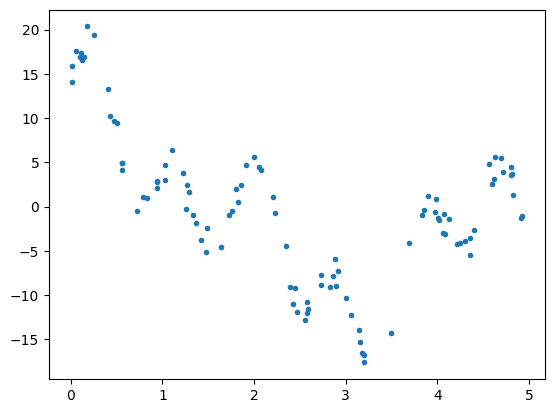

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

# Determinando a quantidade de amostras
quantidade_amostras = 100

# Definindo um estado de aleatoriedade
np.random.seed(seed = 5)

# Definindo a distribuição dos dados
X = np.random.uniform(low = 0, high = 5, size = quantidade_amostras)
y = 10 * np.cos(X) + 5 * np.cos(3 * X) + 5 * np.sin(7 * X) + np.random.normal(loc = 0, scale = 1, size = quantidade_amostras)
# y = 10 * (np.exp(-0.2 / X))

# Apresenta o gráfico
plt.scatter(x = X, y = y, marker = ".")
plt.show()

In [102]:
class RegressaoLinear:

    """

    """

    def __init__(self):
        return None
    
    def verificacao(self, n: int):

        """
        Verifica se o grau de polinômio escolhido é válido.

        Args:
            n (int): Grau do polinômio.
        """

        # Caso 'n' não seja um inteiro
        if not isinstance(n, int):
            raise TypeError(f"'n' deve ser do tipo inteiro, mas recebido {type(n).__name__}")
        
        # Caso 'n' seja menor que 1
        if n < 1:
            raise ValueError("'n' não pode ser menor que 1.")
        
    def add_colunas_um(self, X: np.ndarray) -> np.ndarray:

        """
        Adiciona um vetor coluna na primeira coluna da matriz de projeto.

        Args:
            X (np.ndarray): Matriz de projeto.

        Returns:
            np.ndarray: Matriz de projeto original com um vetor de 1s na primeira coluna.
        """

        # Caso a matriz de projeto ainda não tenha a sua primeira coluna com 1s
        if not np.sum(a = X[:, 0]) == X.shape[0]:

            # Adiciona a coluna de 1s na primeira coluna
            X = np.c_[np.ones_like(a = X), X]

        return X
    
    def add_polinomios(self, X, tipo, n):

        """
        Define a função de base utilizada na matriz de projeto e a quantidade de funções.
        """

        # Adiciona uma coluna vetor na primeira coluna da matriz de projeto0
        X = self.add_colunas_um(X = X)

        if tipo == "polinomio":

            # Cria uma nova matriz para armazenar os polinômios
            nova_matriz = np.zeros(shape = (X.shape[0], n - 1))

            if n > 1:
                for j, i in enumerate(range(2, n + 1)):
                    nova_matriz[:, j] = X[:, 1] ** i

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        elif tipo == "seno":

            if n > 1:

                # Cria uma nova matriz para armazenar os polinômios
                nova_matriz = np.zeros(shape = (X.shape[0], n - 1))

                for j, i in enumerate(range(1, n)):

                    nova_matriz[:, j] = np.sin(X[:, 1] * i)

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        elif tipo == "fourier":

            if n > 1:

                # Cria uma nova matriz para armazenar os polinômios
                nova_matriz = np.zeros(shape = (X.shape[0], (n - 1) * 2))

                for j, i in enumerate(range(1, n)):

                    # Define a posição atual e a posterior da matriz
                    atual = 0 if j == 0 else (j * 2)
                    posterior = atual + 1

                    nova_matriz[:, atual] = np.sin(X[:, 1] * i)
                    nova_matriz[:, posterior] = np.cos(X[:, 1] * i)

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        return X
    
    def ajustar_parametros(self, X, y, tipo, n):
        self.n = n
        self.tipo = tipo
        self.verificacao(n = n)
        self.X = self.add_polinomios(X, tipo, self.n)
        self.w = np.linalg.inv((self.X.T @ self.X)) @ self.X.T @ y

    def predicao(self, X):

        """
        Realiza a predição dos dados
        """

        X = self.add_polinomios(X, self.tipo, self.n)
        return X @ self.w
    

In [107]:
def plotar_grafico(n):

    # Definindo um estado de aleatoriedade
    np.random.seed(seed = 5)
    X = np.random.uniform(low = 0, high = 5, size = quantidade_amostras).reshape(-1, 1)

    # Cria a instância do modelo
    model = RegressaoLinear()

    # Treina o modelo
    model.ajustar_parametros(X, y, "fourier", n)

    # Cria uma matriz projeto aleatória de teste
    X_test = np.linspace(0, 5, 100).reshape(-1, 1)

    # Obtém o vetor de predição
    y_pred = model.predicao(X)

    # Obtém a matriz de projeto
    X = model.X

    # Apresenta alguns dados importantes
    print("Mean Squared Error", np.round(a = np.mean((y - y_pred) ** 2), decimals = 4), '\n')
    print("Mean Absolute Error", np.round(a = np.mean(np.abs(y - y_pred)), decimals = 4), '\n')
    print("Soma do quadrado dos pesos", np.round(a = np.sum(model.w ** 2), decimals = 4))

    #===========================================================================

    # Define o tamanho do gráfico
    plt.figure(figsize = (12, 8))

    # Apresenta a disposição dos dados
    plt.scatter(x = X[:, 1], y = y, marker = ".", label = "y_true")

    # Cria uma matriz com as coordenadas x e y
    matriz_xy = np.c_[X[:, 1], y_pred]

    # Ordena de acordo com o eixo x
    matriz_ordenada = matriz_xy[np.argsort(matriz_xy[:, 0])]

    # Cria a curva apresentando o comportamento do modelo
    plt.plot(matriz_ordenada[:, 0], matriz_ordenada[:, 1], color = "g", label = "y_pred")

    plt.legend()
    plt.show()

# Criação do slider interativo
interact(plotar_grafico, n = IntSlider(value=1, min=1, max=20, step=1, description='Grau do polinômio'));


interactive(children=(IntSlider(value=1, description='Grau do polinômio', max=20, min=1), Output()), _dom_clas…

## 6. Regularização

In [111]:
from drawdata import ScatterWidget
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

In [112]:
# Altere a cor do vscode caso não esteja vendo o painel interativo bem
# Ctrl + Shift + p
# Preferences: Color Theme
widget = ScatterWidget()

widget

ScatterWidget()

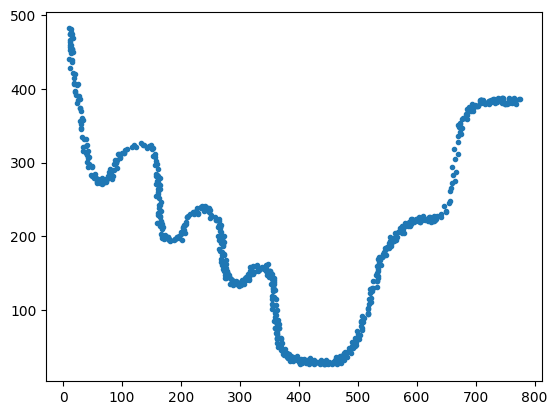

In [152]:
# Estrutura os dados em um dataframe
df = widget.data_as_pandas

# Obtém a matriz de projeto e o vetor de rótulos
X = df.x.to_numpy().reshape(-1, 1)
y = df.y.to_numpy().reshape(-1, 1)

# Apresenta o gráfico
plt.scatter(x = X, y = y, marker = ".")
plt.show()

In [167]:
class RegressaoLinear:

    """

    """

    def __init__(self):
        return None
    
    def verificacao(self, n: int):

        """
        Verifica se o grau de polinômio escolhido é válido.

        Args:
            n (int): Grau do polinômio.
        """

        # Caso 'n' não seja um inteiro
        if not isinstance(n, int):
            raise TypeError(f"'n' deve ser do tipo inteiro, mas recebido {type(n).__name__}")
        
        # Caso 'n' seja menor que 1
        if n < 1:
            raise ValueError("'n' não pode ser menor que 1.")
        
    def add_colunas_um(self, X: np.ndarray) -> np.ndarray:

        """
        Adiciona um vetor coluna na primeira coluna da matriz de projeto.

        Args:
            X (np.ndarray): Matriz de projeto.

        Returns:
            np.ndarray: Matriz de projeto original com um vetor de 1s na primeira coluna.
        """

        # Caso a matriz de projeto ainda não tenha a sua primeira coluna com 1s
        if not np.sum(a = X[:, 0]) == X.shape[0]:

            # Adiciona a coluna de 1s na primeira coluna
            X = np.c_[np.ones_like(a = X), X]

        return X
    
    def add_polinomios(self, X, tipo, n):

        """
        Define a função de base utilizada na matriz de projeto e a quantidade de funções.
        """

        # Adiciona uma coluna vetor na primeira coluna da matriz de projeto0
        X = self.add_colunas_um(X = X)

        if tipo == "polinomio":

            # Cria uma nova matriz para armazenar os polinômios
            nova_matriz = np.zeros(shape = (X.shape[0], n - 1))

            if n > 1:
                for j, i in enumerate(range(2, n + 1)):
                    nova_matriz[:, j] = X[:, 1] ** i

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        elif tipo == "seno":

            if n > 1:

                # Cria uma nova matriz para armazenar os polinômios
                nova_matriz = np.zeros(shape = (X.shape[0], n - 1))

                for j, i in enumerate(range(1, n)):

                    nova_matriz[:, j] = np.sin(X[:, 1] * i)

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        elif tipo == "fourier":

            if n > 1:

                # Cria uma nova matriz para armazenar os polinômios
                nova_matriz = np.zeros(shape = (X.shape[0], (n - 1) * 2))

                for j, i in enumerate(range(1, n)):

                    # Define a posição atual e a posterior da matriz
                    atual = 0 if j == 0 else (j * 2)
                    posterior = atual + 1

                    nova_matriz[:, atual] = np.sin(X[:, 1] * i)
                    nova_matriz[:, posterior] = np.cos(X[:, 1] * i)

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        elif tipo == "pol_fourier":

            if n > 1:

                # Cria uma nova matriz para armazenar os polinômios
                nova_matriz = np.zeros(shape = (X.shape[0], (n - 1) * 3))

                for j, i in enumerate(range(1, n)):

                    # Define a posição atual e a posterior da matriz
                    n_1 = 0 if j == 0 else (j * 3)
                    n_2 = n_1 + 1
                    n_3 = n_2 + 1

                    nova_matriz[:, n_1] = X[:, 1] ** i
                    nova_matriz[:, n_2] = np.sin(X[:, 1] * i)
                    nova_matriz[:, n_3] = np.cos(X[:, 1] * i)

                # Cria uma nova matriz de projeto, considerando a função de base escolhida
                X = np.c_[X, nova_matriz]

        return X
    
    def ajustar_parametros(self, X, y, tipo, n, lamb):
        self.n = n
        self.tipo = tipo
        self.verificacao(n = n)
        self.X = self.add_polinomios(X, tipo, self.n)

        L = np.eye(N = self.X.shape[1])
        L[0, 0] = 0
        L = lamb * L

        self.w = np.linalg.inv((self.X.T @ self.X + L)) @ self.X.T @ y

    def predicao(self, X):

        """
        Realiza a predição dos dados
        """

        X = self.add_polinomios(X, self.tipo, self.n)
        return X @ self.w
    

In [165]:
n = 4

if n > 1:

    # Cria uma nova matriz para armazenar os polinômios
    nova_matriz = np.zeros(shape = (X.shape[0], (n - 1) * 3))

    for j, i in enumerate(range(1, n)):

        # Define a posição atual e a posterior da matriz
        n_1 = 0 if j == 0 else (j * 3)
        n_2 = n_1 + 1
        n_3 = n_2 + 1

        print(n_1, n_2, n_3)

0 1 2
3 4 5
6 7 8


In [169]:
def plotar_grafico(n):

    # Obtém a matriz de projeto e o vetor de rótulos
    X = df.x.to_numpy().reshape(-1, 1)
    y = df.y.to_numpy().reshape(-1, 1)

    # Cria a instância do modelo
    model = RegressaoLinear()

    # Treina o modelo
    model.ajustar_parametros(X, y, "polinomio", n, 10)

    # Obtém o vetor de predição
    y_pred = model.predicao(X)

    # Obtém a matriz de projeto
    X_model = model.X

    print("Mean Squared Error", np.round(a = np.mean((y - y_pred) ** 2), decimals = 4), '\n')
    print("Mean Absolute Error", np.round(a = np.mean(np.abs(y - y_pred)), decimals = 4), '\n')
    print("Soma do quadrado dos pesos", np.round(a = np.sum(model.w ** 2), decimals = 4))

    #===========================================================================

    # Define o tamanho do gráfico
    plt.figure(figsize = (12, 8))

    # Apresenta a disposição dos dados originais
    plt.scatter(x = X, y = y, marker = ".", label = "y_true")

    # Cria uma matriz com as coordenadas x e y
    matriz_xy = np.c_[X_model[:, 1], y_pred]

    # Ordena de acordo com o eixo x
    matriz_ordenada = matriz_xy[np.argsort(matriz_xy[:, 0])]

    # Cria a curva apresentando o comportamento do modelo
    plt.plot(matriz_ordenada[:, 0], matriz_ordenada[:, 1], color = "g", label = "y_pred")

    plt.legend()
    plt.show()

# Criação do slider interativo
interact(plotar_grafico, n = IntSlider(value=1, min=1, max=20, step=1, description='Grau do polinômio'));


interactive(children=(IntSlider(value=1, description='Grau do polinômio', max=20, min=1), Output()), _dom_clas…

### Interpretação geométrica

[Matriz de projeção](https://chatgpt.com/share/68068ace-a10c-8012-a313-17396915a97e)

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

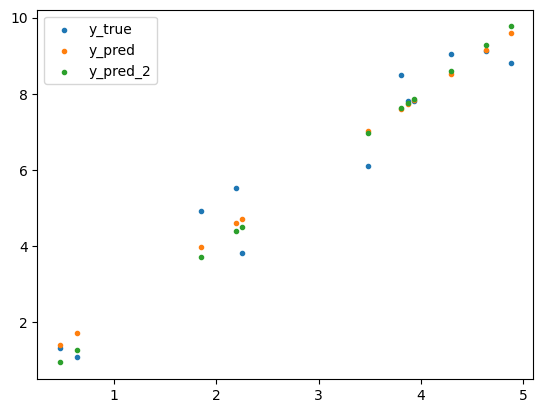

In [271]:
rng = np.random.default_rng(seed = 42)

n = 12

X = rng.uniform(low = 0, high = 5, size = n)
y = X * 2 + rng.normal(loc = 0, scale = 1, size = n)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(X = X, y = y)
y_pred = model.predict(X = X)

plt.scatter(x = X, y = y, marker = ".", label = "y_true")
plt.scatter(x = X, y = y_pred, marker = ".", label = "y_pred")

P = X @ np.linalg.inv((X.T @ X)) @ X.T
y_pred_2 = P @ y

plt.scatter(x = X, y = y_pred_2, marker = ".", label = "y_pred_2")

plt.legend()

plt.show()

In [ ]:


P.shape

(12, 12)

In [269]:
P[0]

array([0.11115962, 0.06303402, 0.12331633, 0.10015965, 0.01352624,
       0.14012399, 0.10931887, 0.11289867, 0.01840035, 0.06468679,
       0.05325595, 0.13310684])

In [270]:
P[1]

array([0.06303402, 0.03574398, 0.06992759, 0.05679639, 0.00767017,
       0.07945852, 0.06199021, 0.06402016, 0.01043408, 0.0366812 ,
       0.03019925, 0.07547938])

### Future Alaatus

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [147]:
df = pd.read_csv("peso_area_balao.csv")

display(df.sample(3))

,Área do balão na foto (cm^2),Peso real do balão (gramas)
51,151.380017,773
81,222.012267,1170
17,172.456030,917


In [168]:
X = df["Área do balão na foto (cm^2)"].to_numpy()
y = df["Peso real do balão (gramas)"].to_numpy()

model = LinearRegression()
model.fit(X = X.reshape(-1, 1), y = y)

LinearRegression()

In [171]:
x_min, x_max = X.min(), X.max()
y_pred_min, y_pred_max = model.predict(x_min.reshape(-1, 1)), model.predict(x_max.reshape(-1, 1))

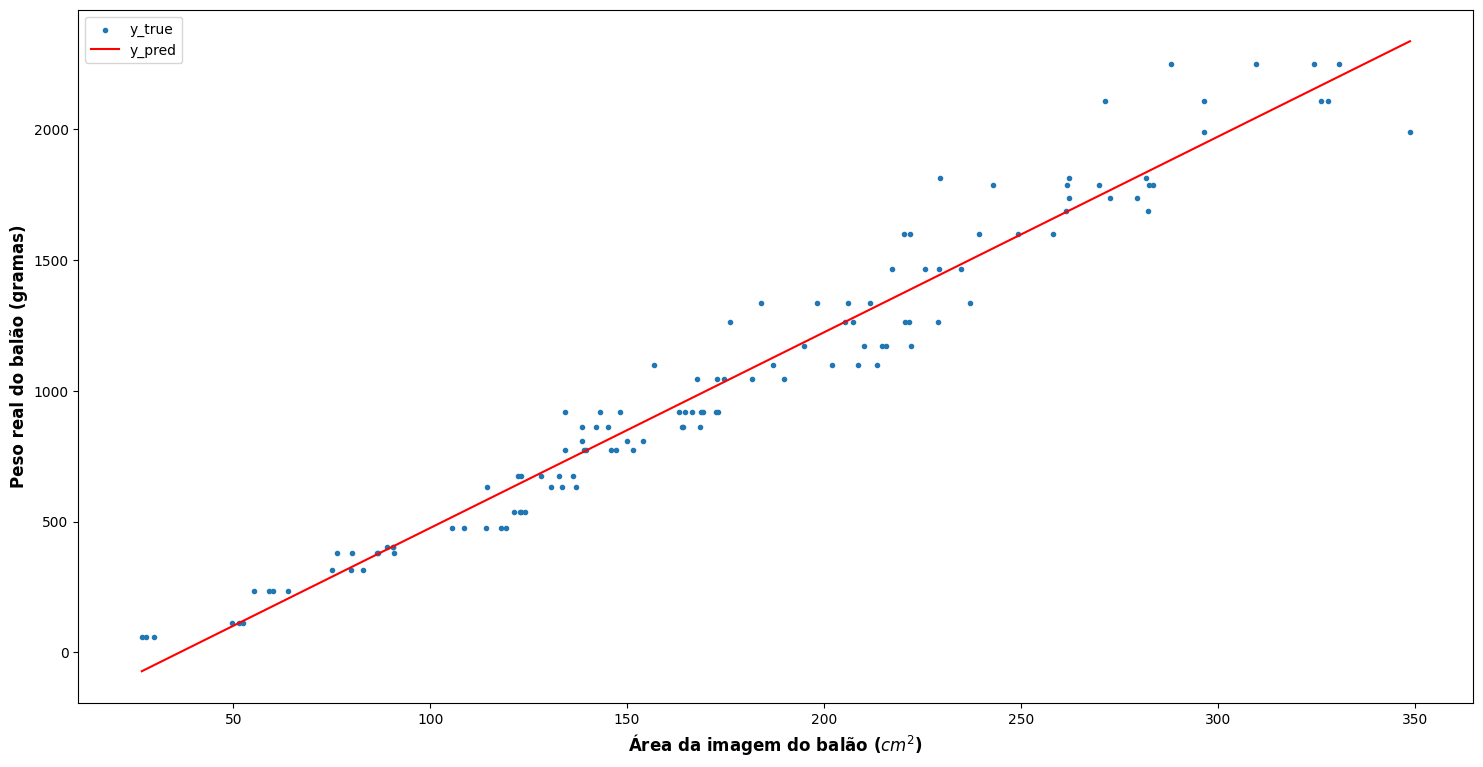

In [167]:
plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")
plt.plot([x_min, x_max], [y_pred_min, y_pred_max], color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

Cria novas colunas no dataframe

In [175]:
df["y_pred"] = model.predict(X = X.reshape(-1, 1))
df["diff_true_pred"] = df["y_pred"] - df["Peso real do balão (gramas)"]

display(df)

,Área do balão na foto (cm^2),Peso real do balão (gramas),y_pred,diff_true_pred
0,52.378388,114,119.362696,5.362696
1,51.365084,114,111.783548,-2.216452
2,49.765796,114,99.821452,-14.178548
3,26.796750,59,-71.978727,-130.978727
4,29.927118,59,-48.564708,-107.564708
...,...,...,...,...
117,105.447323,477,516.299193,39.299193
118,119.257392,477,619.593532,142.593532
119,117.967489,477,609.945521,132.945521
120,296.566083,1990,1945.798605,-44.201395


In [217]:
chaves = [i/20 for i in range(20)]
valores = [f"{round(i/20 * 100, 1)}" for i in range(20)]

d = dict(zip(chaves, valores))

df.quantile(q = [i/20 for i in range(20)]).rename(index = d).round(decimals = 1).sort_index(ascending = False)

,Área do balão na foto (cm^2),Peso real do balão (gramas),y_pred,diff_true_pred
95.0,296.6,2109.0,1945.7,166.0
90.0,281.5,1810.5,1832.8,129.7
85.0,262.2,1736.0,1688.7,112.6
80.0,238.9,1598.0,1514.5,98.7
75.0,224.7,1464.0,1408.2,73.1
70.0,216.8,1312.4,1349.3,61.5
65.0,208.1,1229.8,1284.3,50.0
60.0,192.8,1099.0,1169.7,37.2
55.0,173.8,1046.0,1027.7,20.5
50.0,168.2,920.0,985.6,4.6


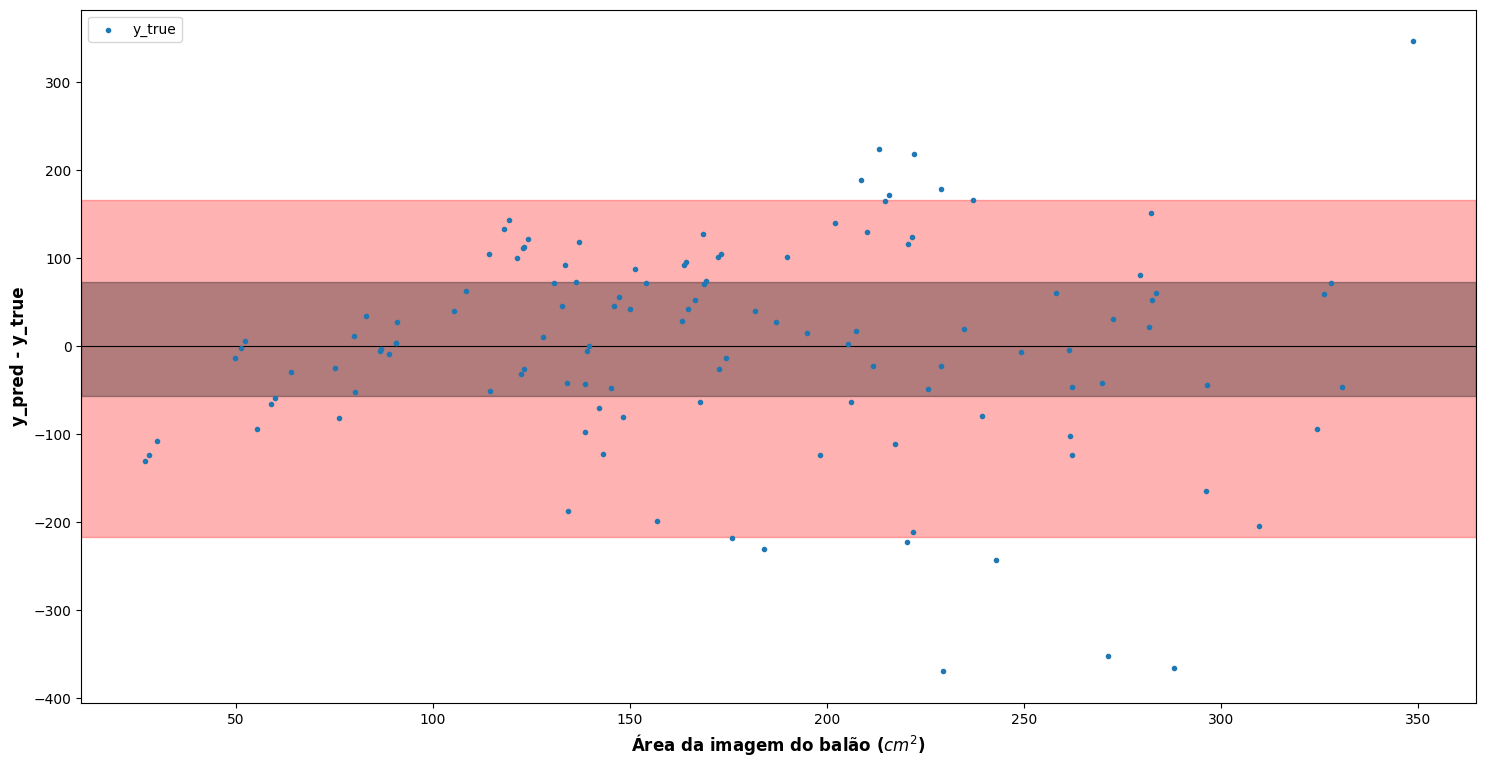

In [226]:
plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = df["diff_true_pred"], marker = ".", label = "y_true", zorder = 5)
plt.axhline(y = 0, color = "k", zorder = 2, lw = 0.8)

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

plt.axhspan(ymin = -57.2, ymax = 73.1, alpha = 0.3, color = "k", zorder = 1)
plt.axhspan(ymin = -217.5, ymax = 166.0, alpha = 0.3, color = "r", zorder = 0)

plt.legend()

plt.show()

O modelo está está detectando menos peso em relação ao valor real

Considerando: $$V = \frac{A^{\frac{3}{2}}}{6 \sqrt{\pi}}$$

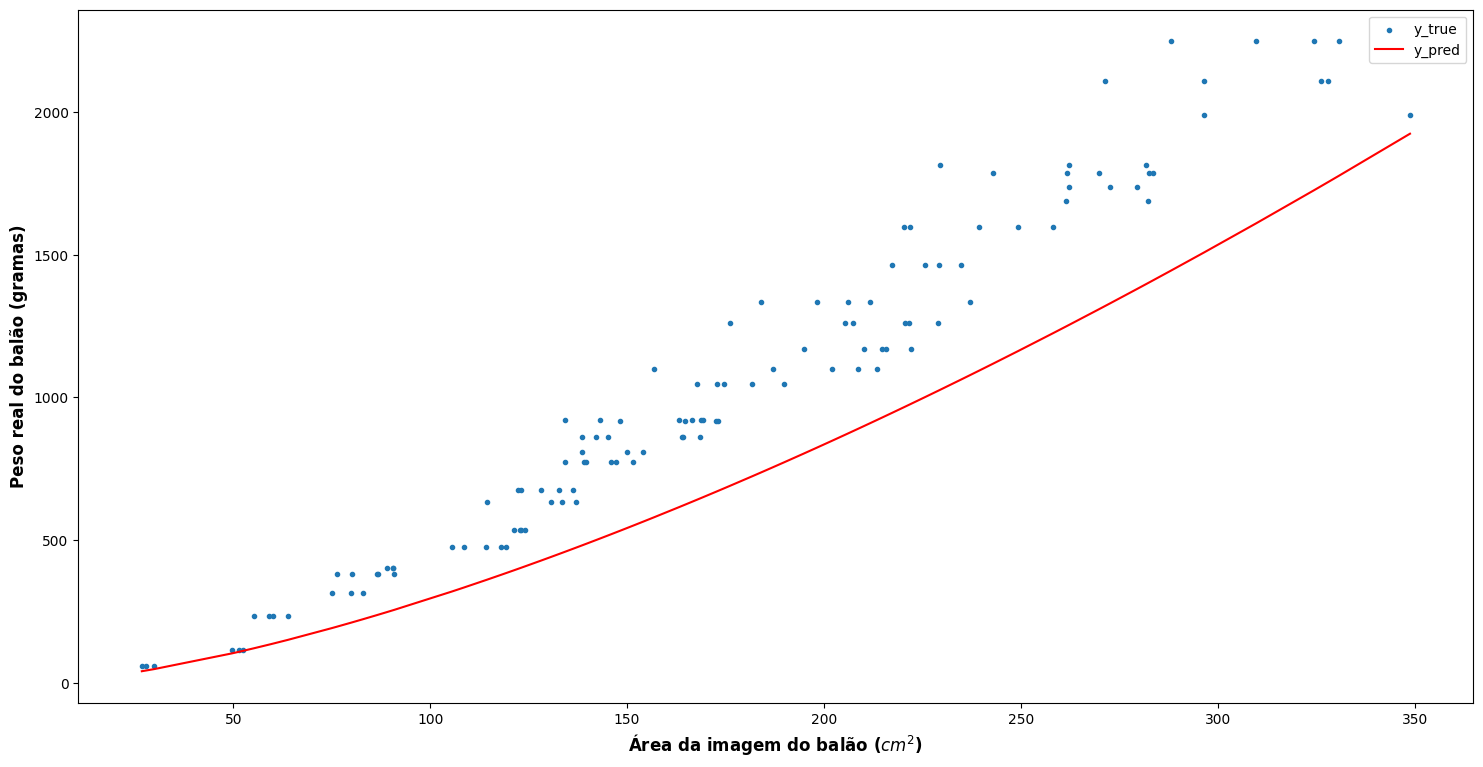

In [ ]:
X_ordenado = np.sort(a = X)
y_esfera = (X_ordenado ** (3 / 2)) / 6 * np.sqrt(np.pi)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")
plt.plot(X_ordenado, y_esfera, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

Regressão polinimial de grau 2

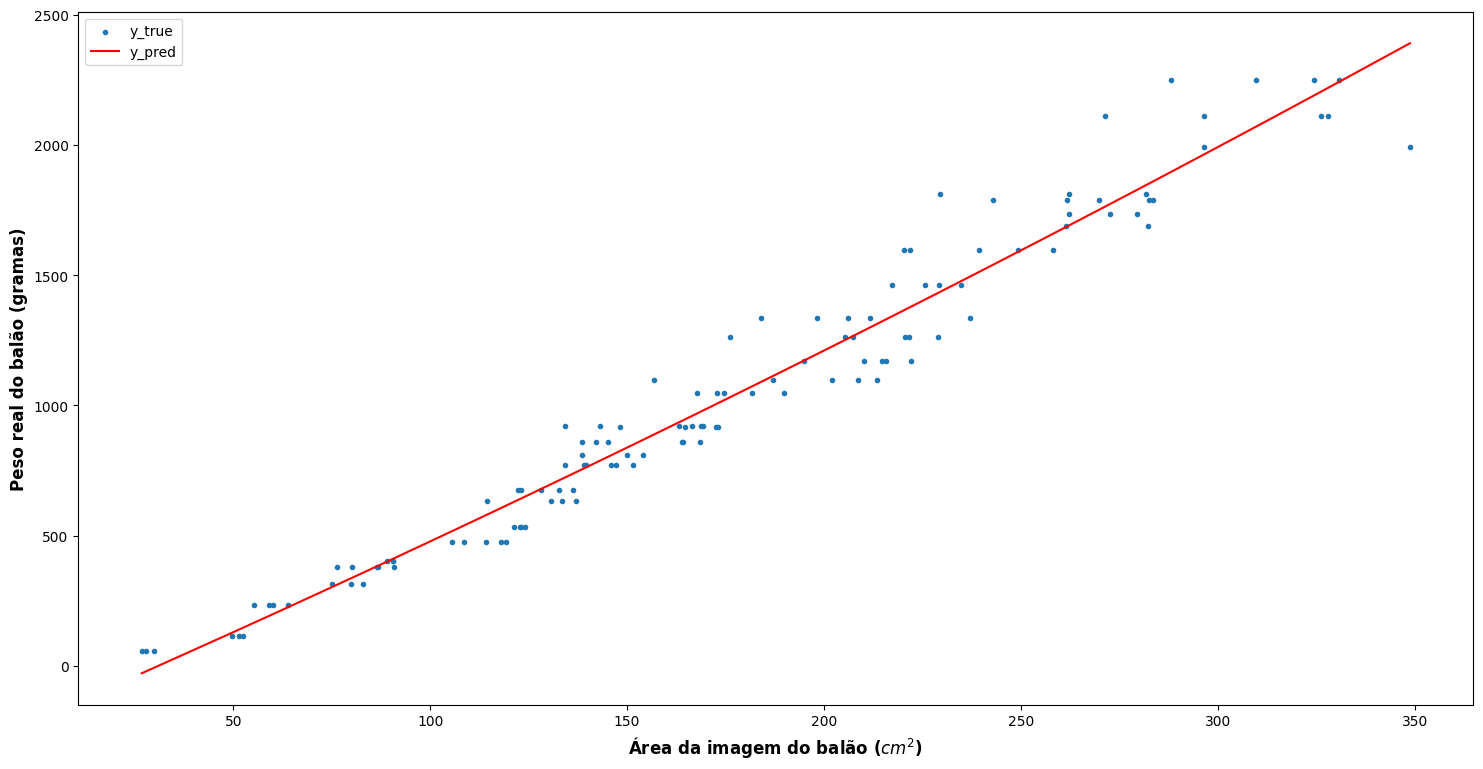

In [234]:
X_ordenado = np.sort(a = X)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")

coef = np.polyfit(x = X, y = y, deg = 2)
pol = np.poly1d(coef)
y_pol = pol(X_ordenado)

plt.plot(X_ordenado, y_pol, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

Regressão polinimial de grau 3

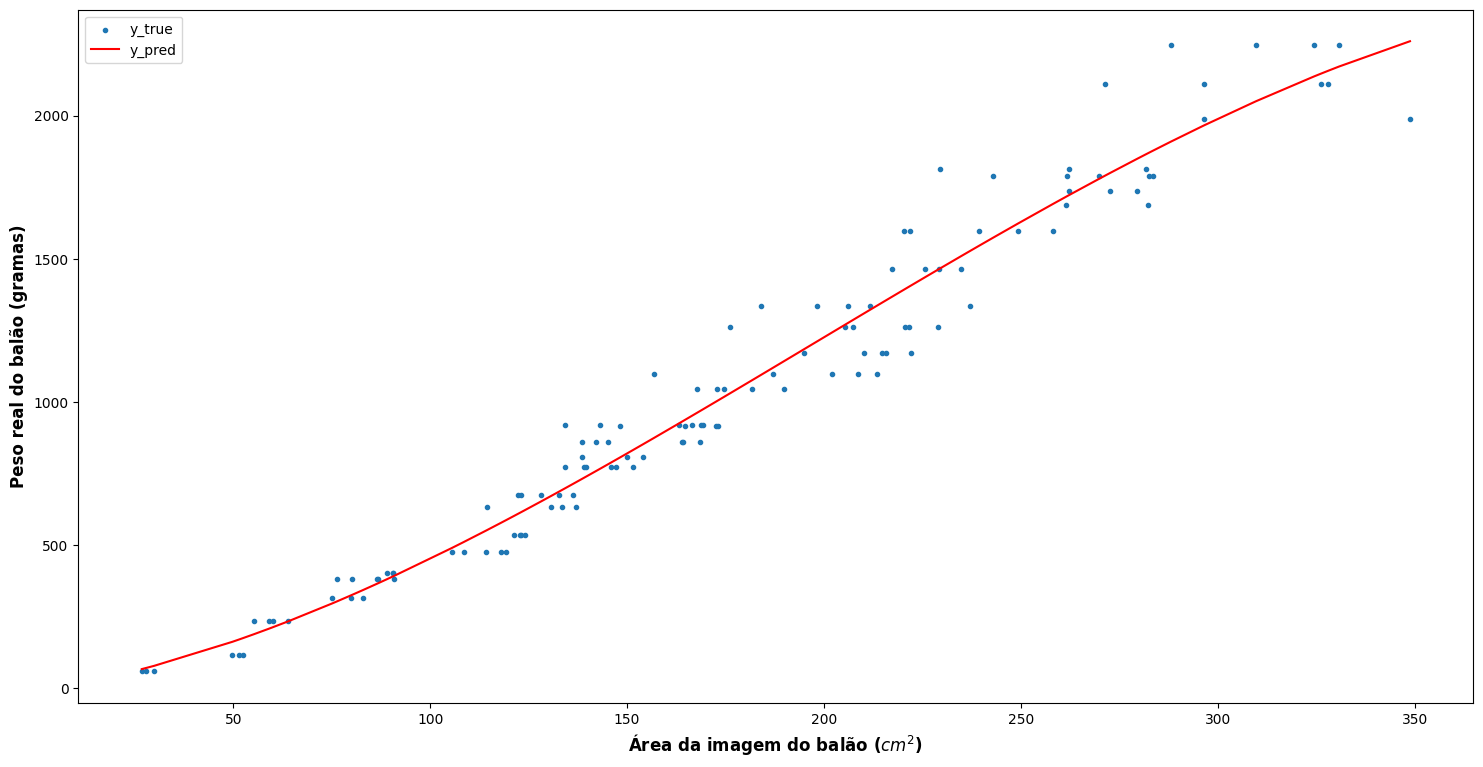

In [233]:
X_ordenado = np.sort(a = X)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")

coef = np.polyfit(x = X, y = y, deg = 3)
pol = np.poly1d(coef)
y_pol = pol(X_ordenado)

plt.plot(X_ordenado, y_pol, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

# Regressão Linear e Regularização (Professor)

## 1. Regressão linear simples

 **Obs:** Nesse contexto, **simples** significa **com um único atributo** (n=1)

<span style="color: #FFC107; font-size: 22px;">**Distribuição uniforme**</span>

<span style="color: #2196F3; font-size: 18px;">Na distribuição uniforme, todos os resultados possíveis têm a mesma probabilidade de ocorrer. Existem dois tipos principais de distribuição uniforme: discreta e contínua.</span>

<span style="color: #FFC107; font-size: 22px;">**Distribuição Normal (ou Gaussiana)**</span>

<span style="color: #2196F3; font-size: 18px;">A distribuição normal, por outro lado, tem uma forma de "sino" e é uma das distribuições mais importantes na estatística devido ao teorema central do limite. A variável aleatória normalmente distribuída assume valores mais prováveis perto da média, com probabilidades menores conforme os valores se afastam da média.</span>

### 1.1. Análise inicial

In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
from typing import Tuple

def gen_data(n_samples: int = 100, random_state: int = 42) -> Tuple[np.ndarray, np.ndarray]:
    
    """
    Cria valores 'x' com distribuição uniforme e valores 'y' com um comportamento linear com variações da distribuição normal.
    f(x) = 70 + 8x + (Ruído com comportamento normal de média 0 e desvio padrão igual a 10)

    Args:
        n_samples (int): Quantidade de amostras
        random_state (int): Semente que manterá o mesmo estado aleatório

    Returns:
        Tuple[np.ndarray, np.ndarray]: 
    """

    # Forma que o professor utilizou, o random_state faz com que os valores sejam sempre os mesmos para a mesma semente
    rng = np.random.RandomState(random_state)

    # Forma recomendada pelo Numpy, o random_state faz com que os valores sejam sempre os mesmos para a mesma semente
    rng = np.random.default_rng(random_state)

    # Gera uma distribuição uniforme
    x = rng.uniform(low = 2, high = 12, size = n_samples)

    # Gera uma distribuição normal
    y = 70 + (8 * x) + (10 * rng.standard_normal(size = n_samples))

    # Transforma para um vetor coluna
    X = x.reshape(-1, 1)

    return X, y

X:  (100, 1)
y:  (100,)


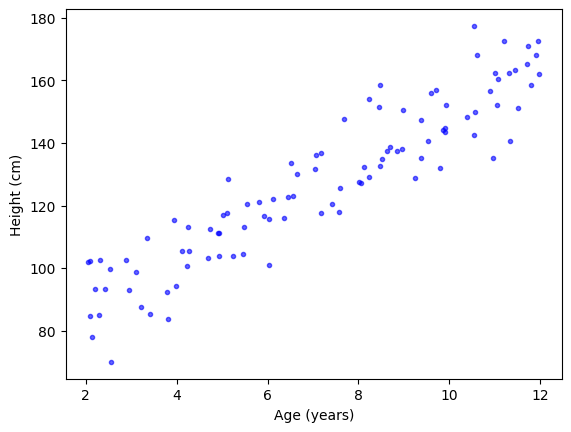

In [120]:
# Cria valores 'x' com distribuição uniforme e valores 'y' com distribuição normal
X, y = gen_data(n_samples = 100, random_state = 27)

# Apresenta as dimensões de X e y
print('X: ', X.shape)
print('y: ', y.shape)

# Plota um gráfico com os pontos de X e y em azul
plt.scatter(x = X, y = y, marker = ".", color = "b", alpha = 0.6)

# Cria uma legenda para o eixo x
plt.xlabel(xlabel = 'Age (years)')

# Cria uma legenda para o eixo y
plt.ylabel(ylabel = 'Height (cm)')

plt.show()

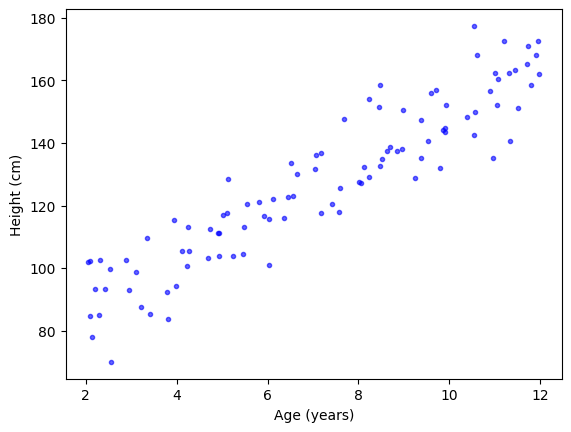

In [121]:
def plot_data(X: np.ndarray, y: np.ndarray) -> None:

    """
    Plota um gráfico de pontos, com base nos valores de X e y

    Args:
        X (np.ndarray): Valores do eixo x
        y (np.ndarray): Valores do eixo y
    """

    # Cria um gráfico de dispersão
    plt.scatter(x = X, y = y, color = "b", marker = ".", alpha = 0.6)

    # Apresenta um rótulo para o eixo x
    plt.xlabel('Age (years)')

    # Apresenta um rótulo para o eixo y
    plt.ylabel('Height (cm)');
    
    return None

plot_data(X, y)

### 1.2. Regressão linear usando sklearn

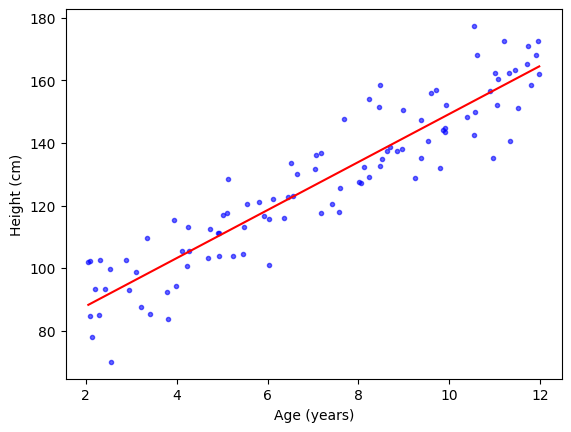

In [122]:
from sklearn.linear_model import LinearRegression

# Cria uma instância da classe LienarRegression
model = LinearRegression()

# Treina o modelo com base nos valores de 'X' e 'y'
model.fit(X = X, y = y)

# Realiza uma predição com base no valores de 'X' no modelo treinado
y_pred = model.predict(X = X)

# Plota o gráfico dos valores 'X' e 'y' dos dados originais
plot_data(X = X, y = y)

# Define valores para o x com base no valor mínimo e máximo dos dados originais
x_reta_regressao = np.linspace(start = np.min(a = X), stop = np.max(a = X), num = 100).reshape(-1, 1)

# Realiza a predição da variável y com base na variável x
y_reta_regressao = model.predict(X = x_reta_regressao)

# Cria uma reta com a predição do modelo
plt.plot(x_reta_regressao, y_reta_regressao, color = "r", zorder = 2)

plt.show()

In [123]:
# Obtém o coeficiente linear
b = model.intercept_

# Obtém o coeficiente angular
w = model.coef_

# Apresenta os coeficientes
print(f'b = {b}, w = {w}', '\n')

b = 72.46437813290328, w = [7.68321167] 



Ponto 1: (2.05, 88.25)
Ponto 2: (11.98, 164.50)


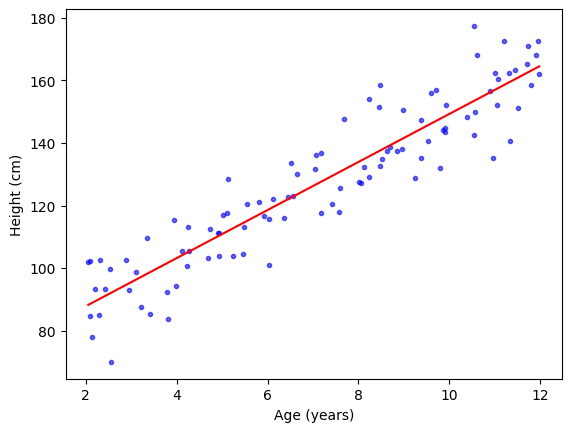

In [124]:
# Plota o gráfico
plot_data(X, y)

# Cria um array com dois valores, o valor mínimo e máximo de 'X'
x_line = np.array([X.min(), X.max()])

# Como o 'y_line' deverá ser obtido
tipo_y_line = 0

# Obtém os pontos no eixo 'y' com base no eixo 'X'
if tipo_y_line == 0:  y_line = b + (w * x_line)

# Obtém os pontos no eixo 'y' com base na predição do modelo usando os valores de 'X'
else: y_line = model.predict(x_line.reshape(-1, 1))

# Define os dois pontos utilizados para traçar a reta
print(f'Ponto 1: ({x_line[0]:.2f}, {y_line[0]:.2f})')
print(f'Ponto 2: ({x_line[1]:.2f}, {y_line[1]:.2f})')

# Cria uma reta com base nos dois pontos
plt.plot(x_line, y_line, color = "r", linestyle = "-")

plt.show()

### 1.3. Implementação em Python

- Modelo: $\hat{y} = \bw^T \bx = \bx^T \bw$, onde $\bw = (b, w_1, \ldots, w_n)^T$ e $\bx = (1, x_1, \ldots, x_n)^T$
- Treinamento: $\bw = (\bX^T \bX)^{-1}\bX^T \by$, onde $\bX[i] = (1, {\bx^{[i]}}^T)$
- Predições: $\hat{\by} = \bX\bw$

#### Construção do modelo

In [ ]:
class LinReg():

    def __init__(self):
        return
    
    def _add_ones_column(self, X):

        """
        Cria uma coluna de 1 na primeira coluna de X
        """

        # X = np.c_[np.ones(X.shape[0]), X] # Método do professor
        X = np.c_[np.ones_like(a = X), X] # Meu método
        return X
    
    def fit(self, X, y):
        X = self._add_ones_column(X)
        self.w = np.linalg.inv(X.T @ X) @ (X.T @ y)
        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]
        return self

    def predict(self, X):
        X = self._add_ones_column(X)
        y_pred = X @ self.w
        return y_pred

**Exercício em sala:** complete a função acima.

<details><summary>Solução</summary>

```python
def predict(self, X):
    X = self._add_ones_column(X)
    y_pred = X @ self.w
    return y_pred
```
</details>

[[ 1.          8.97736216]
 [ 1.          5.13814272]
 [ 1.          3.21197099]
 [ 1.          5.23591522]
 [ 1.         11.31211865]
 [ 1.          9.89667313]
 [ 1.          2.10019124]
 [ 1.          3.98933217]
 [ 1.          4.93113693]
 [ 1.         11.43415712]
 [ 1.          6.03437055]
 [ 1.          3.81816097]
 [ 1.         10.60387912]
 [ 1.         11.07070147]
 [ 1.          5.01747975]
 [ 1.          5.55198104]
 [ 1.          9.53552376]
 [ 1.          4.68342113]
 [ 1.          9.89422404]
 [ 1.          6.50839894]
 [ 1.          8.47067312]
 [ 1.         10.95160516]
 [ 1.          2.29317613]
 [ 1.          5.44913243]
 [ 1.          9.70377238]
 [ 1.          8.01206903]
 [ 1.          3.11308574]
 [ 1.         10.90163334]
 [ 1.         11.70069148]
 [ 1.          2.13817507]
 [ 1.          6.35680083]
 [ 1.          5.48841022]
 [ 1.         10.99944861]
 [ 1.          2.41494886]
 [ 1.         10.5503185 ]
 [ 1.          4.23467769]
 [ 1.          2.89385177]
 

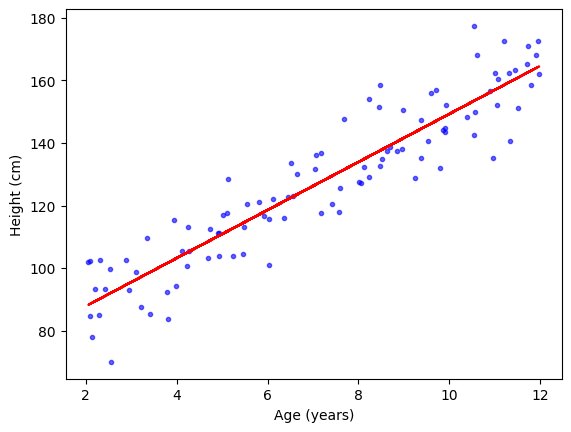

In [126]:
# Cria uma instância de LinReg()
model = LinReg()

# Treina o modelo (Ajusta os parâmetros do modelo)
model.fit(X, y)

# Realiza a predição do modelo com os dados de treinamento
y_pred = model.predict(X)

# Apresenta os dados reais
plot_data(X, y)

# Apresenta os dados previstos
plt.plot(X, y_pred, color = "r")

plt.show()

In [127]:
b = model.intercept_
w = model.coef_

print(f'b = {b}, w = {w}')

b = 72.46437813290304, w = [7.68321167]


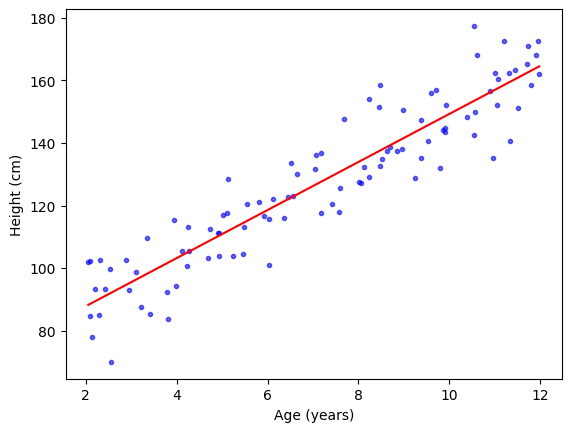

In [21]:
# Apresenta os dados reais
plot_data(X, y)

x_line = np.array([X.min(), X.max()])
y_line = b + w * x_line

# Apresenta os dados previstos
plt.plot(x_line, y_line, 'r-');

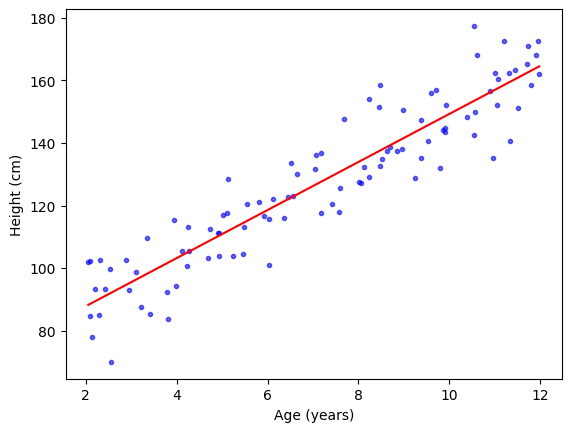

In [20]:
# Apresenta os dados reais
plot_data(X, y)

x_line = np.array([X.min(), X.max()])
y_line = model.predict(x_line.reshape(-1, 1))

# Apresenta os dados previstos
plt.plot(x_line, y_line, 'r-');

In [23]:
# Back to sklearn
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

### 1.4. Avaliação do modelo

In [27]:
mse = np.mean((y - y_pred) ** 2)

print(mse)

88.78011428281081


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true = y, y_pred = y_pred)

print(mse)

88.78011428281081


*Baseline*: modelo constante $\hat{y} = b$

$b = ((1,\ldots,1) (1,\ldots,1)^T)^{-1} (1,\ldots,1) \by = m^{-1} \sum_{i=1}^m y^{(i)}$

(**Obs**: *baseline* refere-se a um modelo relativamente simples de implementar ou facilmente disponível com o qual você pretende comparar o seu modelo. Pode ser até mesmo o modelo estado-da-arte de um determinado problema, se já estiver bem consolidado na literatura.)



In [40]:
media = y.mean()
print(media)

127.53110049515246


In [41]:
y_const = np.full(shape = y.shape, fill_value = media)

print(y_const.shape)

(100,)


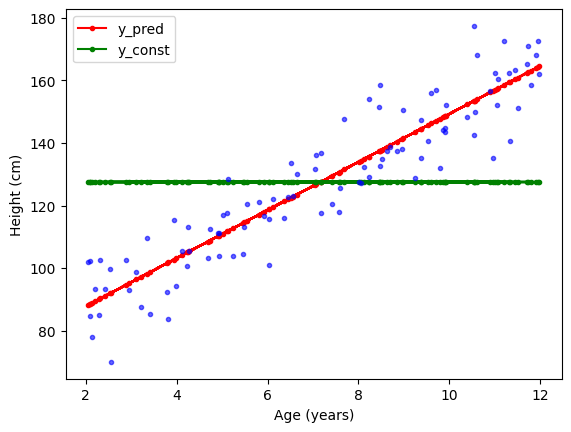

In [39]:
plot_data(X, y)
plt.plot(X, y_pred, 'r.-', label='y_pred', zorder = 0);
plt.plot(X, y_const, 'g.-', label='y_const', zorder = 0);
plt.legend();

plt.show()

In [42]:
# Calcula o MSE, considerando que o y_pred é a média dos dados
mse_const = mean_squared_error(y, y_const)

print(mse_const)

632.0029551009247


In [43]:
y.var()

np.float64(632.0029551009247)

In [44]:
mse/mse_const

0.14047420754327564

In [45]:
r2 = 1 - mse/mse_const
r2

0.8595257924567243

In [47]:
from sklearn.metrics import r2_score
r2_score(y_true = y, y_pred = y_pred)

0.8595257924567243

In [48]:
model.score(X, y)

0.8595257924567243

Note que `r2` pode ser negativo se o modelo for pior que o constante!

r2        : 0.8595257924567243
r2 (const): 0.0
r2 (bad)  : -7.375779595218319


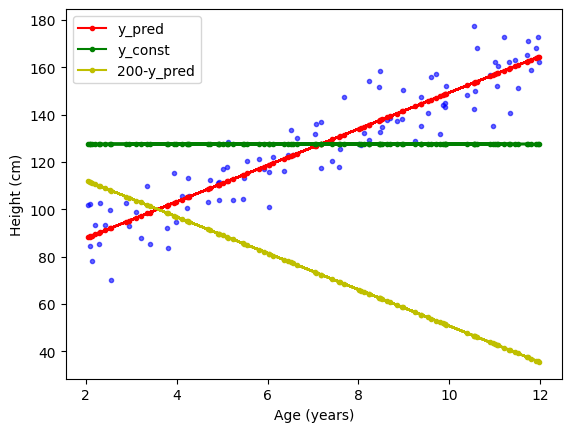

In [49]:
y_bad = 200 - y_pred
print('r2        :', r2_score(y, y_pred))
print('r2 (const):', r2_score(y, y_const))
print('r2 (bad)  :', r2_score(y, y_bad))
plot_data(X, y)
plt.plot(X, y_pred, 'r.-', label='y_pred');
plt.plot(X, y_const, 'g.-', label='y_const');
plt.plot(X, y_bad, 'y.-', label='200-y_pred')
plt.legend();

No caso particular da **regressão linear simples por mínimos quadrados**, temos `r2` = $r^2$, onde:
- $r = \text{cov}(\bx, \by) \; / \left(\text{std}(\bx) \cdot \text{std}(\by) \right)$ 
é o *coeficiente de correlação de Pearson* e
- $\text{cov}(\bx, \by) = n^{-1}\sum_{j=1}^n (x_j - \text{mean}(\bx))(y_j - \text{mean}(\by))$ é a covariância entre $x$ e $y$

In [50]:
x = X.reshape(-1)
#cov = np.cov(x, y, ddof=0)[0, 1]
cov = np.mean( (x - x.mean()) * (y - y.mean()) )
r = cov/(x.std()*y.std())

print(f'cov = {cov}')
print(f'r   = {r}')
print(f'r2  = {r**2}')

cov = 70.70257384508832
r   = 0.9271061387223819
r2  = 0.8595257924567244


In [51]:
np.cov(x, y, ddof = 0)

array([[  9.20221606,  70.70257385],
       [ 70.70257385, 632.0029551 ]])

In [25]:
from scipy.stats import pearsonr
r = pearsonr(y, y_pred)[0]
print(f'r   = {r}')
print(f'r2  = {r**2}')

r   = 0.9160953603177872
r2  = 0.8392307091957762


**Coeficiente de correlação:**

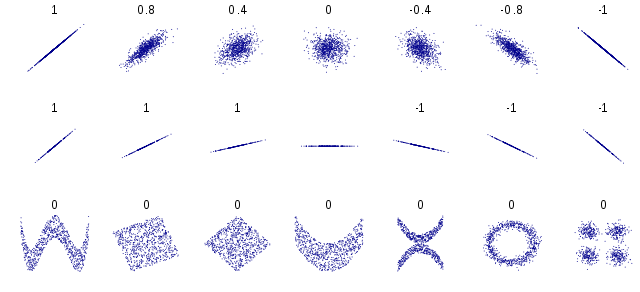

### 1.5. Outras métricas de avaliação

In [52]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

np.float64(9.422320005328348)

In [60]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_true = y, y_pred = y_pred)
rmse

9.422320005328348

**Exercício em sala:** escreva uma função que calcula o RMSE sem usar a função `mean_squared_error` do sklearn, usando apenas NumPy.

<details><summary>Solução</summary>

```python
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))
```
ou
```python
def root_mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()**0.5
```
ou simplesmente
```python
root_mean_squared_error = lambda a, b: ((a-b)**2).mean()**0.5
```
</details>

In [28]:
def root_mean_squared_error(y_true, y_pred):
    return ???

In [61]:
rmse = root_mean_squared_error(y, y_pred)
rmse

9.422320005328348

In [65]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_true = y, y_pred = y_pred)
mape = mean_absolute_percentage_error(y_true = y, y_pred = y_pred)

print(f'RMSE: {rmse:.3} cm')
print(f' MAE: {mae:.3} cm')
print(f'MAPE: {mape:.1%}')

RMSE: 9.42 cm
 MAE: 7.62 cm
MAPE: 6.3%


In [70]:
from sklearn.metrics import median_absolute_error
medae = median_absolute_error(y_true = y, y_pred = y_pred)
print(f'MedAE: {medae:.3} cm')

MedAE: 5.98 cm


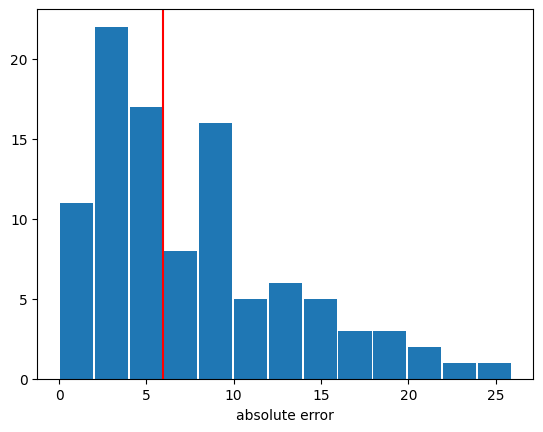

In [67]:
bins = np.arange(0, np.abs(y - y_pred).max() + medae/3, medae/3)
plt.hist(np.abs(y - y_pred), bins=bins, rwidth=0.95);
plt.axvline(medae, color='r');
plt.xlabel('absolute error');

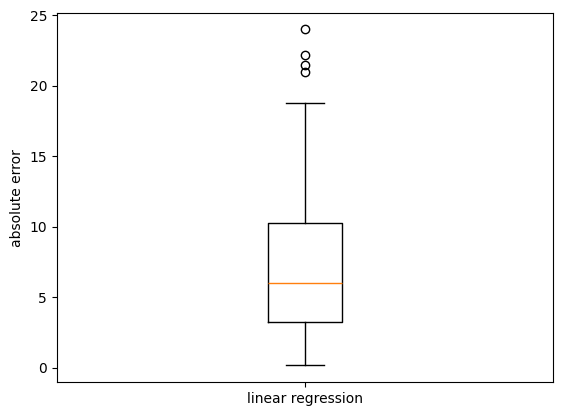

In [69]:
plt.boxplot(np.abs(y - y_pred), tick_labels=['linear regression']);
plt.ylabel('absolute error');

Definições de um *boxplot*:

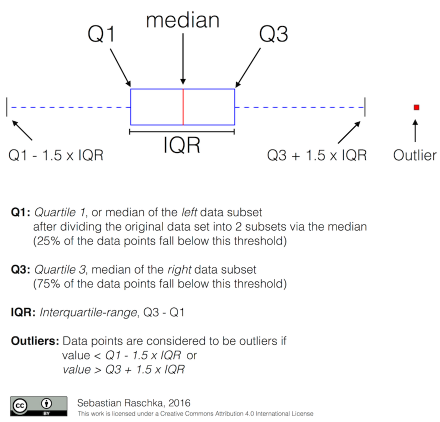

- https://matplotlib.org/stable/_images/boxplot_explanation.png
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
- https://en.wikipedia.org/wiki/Box_plot

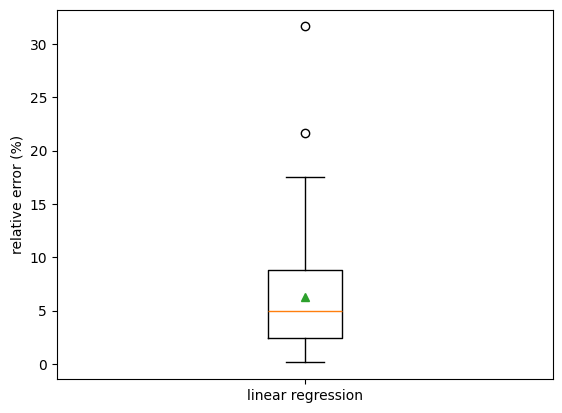

In [73]:
plt.ylabel('relative error (%)');
plt.boxplot(np.abs(y - y_pred)/y * 100, tick_labels=['linear regression'], showmeans = True);

### 1.6. Avaliação no conjunto de teste

A partir de agora, vamos usar uma notação mais apropriada para o conjunto de treinamento (`X_train`, `y_train`), para distinguir do conjunto de teste e não confundir com o conjunto completo (treinamento + teste). 

In [74]:
# To make sure we don't use them by mistake
X, y = None, None

In [103]:
# Cria dados artificiais para o conjunto de treinamento e de teste
X_train, y_train = gen_data(n_samples = 100, random_state = 27)
X_test, y_test = gen_data(n_samples = 100, random_state = 6)

print('Training set:', X_train.shape, y_train.shape)
print('    Test set:', X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print('')
print('Train MSE:', mean_squared_error(y_train, model.predict(X_train)))
print(' Test MSE:', mean_squared_error(y_test, model.predict(X_test)))

Training set: (100, 1) (100,)
    Test set: (100, 1) (100,)

Train MSE: 88.78011428281081
 Test MSE: 115.05539230689239


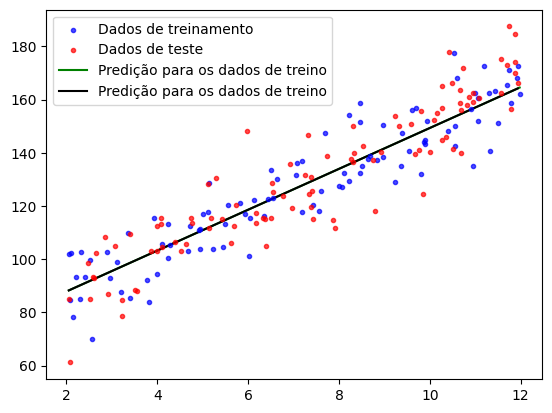

In [120]:
plt.scatter(x = X_train, y = y_train, color = "b", marker = ".", label = "Dados de treinamento", alpha = 0.7)
plt.scatter(x = X_test, y = y_test, color = "r", marker = ".", label = "Dados de teste", alpha = 0.7)

X_treino_ordenado = np.sort(a = X_train.ravel()).reshape(-1, 1)
y_treino_previsto = model.predict(X_treino_ordenado)

X_teste_ordenado = np.sort(a = X_test.ravel()).reshape(-1, 1)
y_teste_previsto = model.predict(X_teste_ordenado)

plt.plot(X_treino_ordenado, y_treino_previsto, label = "Predição para os dados de treino", color = "g", zorder = 0)
plt.plot(X_teste_ordenado, y_teste_previsto, label = "Predição para os dados de treino", color = "k", zorder = 0)

plt.legend()

plt.show()

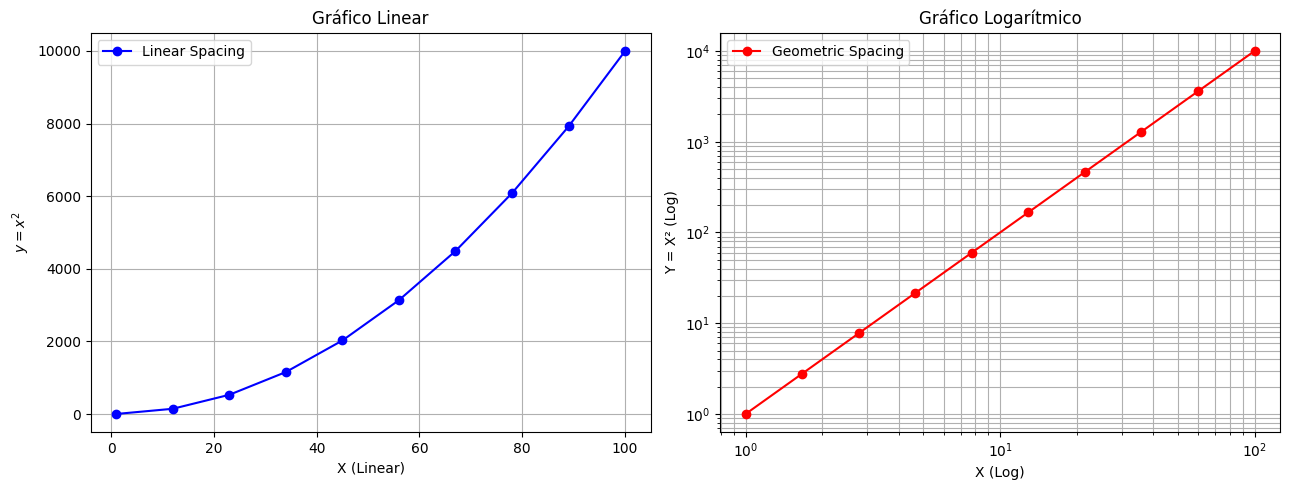

In [162]:
# Gerando dados espaçados linearmente e geometricamente
x_linear = np.linspace(1, 100, 10)   # Espaçamento linear
y_linear = x_linear**2                # y = x² para demonstrar crescimento

x_geom = np.geomspace(1, 100, 10)    # Espaçamento geométrico
y_geom = x_geom**2                    # Mesmo crescimento quadrático

# Criando os gráficos
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(13, 5))

# Gráfico com escala normal (linear)
ax[0].plot(x_linear, y_linear, 'bo-', label="Linear Spacing")
ax[0].set_title("Gráfico Linear")
ax[0].set_xlabel("X (Linear)")
ax[0].set_ylabel("$y = x^2$")
ax[0].legend()
ax[0].grid()

# Gráfico com escala logarítmica
ax[1].plot(x_geom, y_geom, 'ro-', label="Geometric Spacing")
ax[1].set_xscale("log")  # Escala logarítmica no eixo X
ax[1].set_yscale("log")  # Escala logarítmica no eixo Y
ax[1].set_title("Gráfico Logarítmico")
ax[1].set_xlabel("X (Log)")
ax[1].set_ylabel("Y = X² (Log)")
ax[1].legend()
ax[1].grid(which="both")  # Grid para log

# Exibir os gráficos
plt.tight_layout()
plt.show()

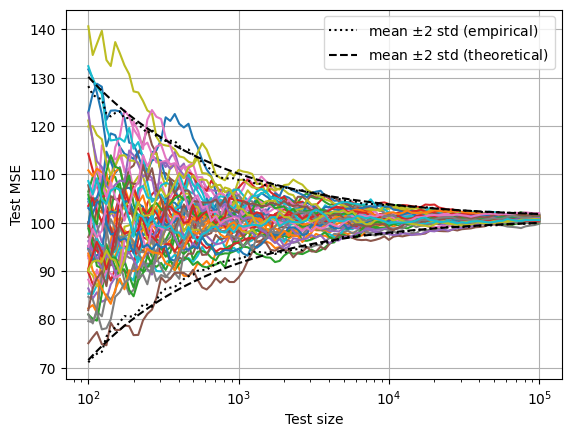

In [145]:
# Cria um vetor entre 100 e 100000 com 100 elentos, espaçados geometricamente (com progressão geométrica)
test_sizes = np.geomspace(100, 100_000, 100).astype(int)

# Cria uma matriz de zeros com 50 linhas e 100 colunas
test_errors = np.zeros((50, len(test_sizes)))

for r in range(test_errors.shape[0]):

    X_test, y_test = gen_data(n_samples = test_sizes[-1], random_state = 100 + r)
    
    y_test_pred = model.predict(X_test)

    for i in range(len(test_sizes)):
        
        test_errors[r, i] = mean_squared_error(y_test[:test_sizes[i]], y_test_pred[:test_sizes[i]])
    plt.plot(test_sizes, test_errors[r]);

MSE_mean = np.mean(test_errors[:, -1])
MSE_std = np.std(test_errors[:, -1])*np.sqrt(test_sizes[-1])

plt.xlabel('Test size');
plt.ylabel('Test MSE');
plt.xscale('log');
plt.grid();
plt.plot(test_sizes, np.mean(test_errors, axis=0) + 2*np.std(test_errors, axis=0), 'k:', label= r'mean $\pm 2$ std (empirical)');
plt.plot(test_sizes, np.mean(test_errors, axis=0) - 2*np.std(test_errors, axis=0), 'k:');
plt.plot(test_sizes, MSE_mean + 2*MSE_std/np.sqrt(test_sizes), 'k--', label= r'mean $\pm 2$ std (theoretical)');
plt.plot(test_sizes, MSE_mean - 2*MSE_std/np.sqrt(test_sizes), 'k--');
plt.legend();

- Para um dado modelo, o desempenho de teste apresenta uma variação estatística que diminui com o número de amostras de teste $m_{\text{test}}$; mais precisamente, decai com $1/\sqrt{m_{\text{test}}}$

In [38]:
X_test, y_test = gen_data(n_samples=100000, random_state=6)

X_train, y_train = gen_data(n_samples=100, random_state=27)
print('Training set:', X_train.shape, y_train.shape)
print('    Test set:', X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print('')
print('Train MSE:', mean_squared_error(y_train, model.predict(X_train)))
print(' Test MSE:', mean_squared_error(y_test, model.predict(X_test)))

Training set: (100, 1) (100,)
    Test set: (100000, 1) (100000,)

Train MSE: 99.54452956702795
 Test MSE: 101.4475377637904


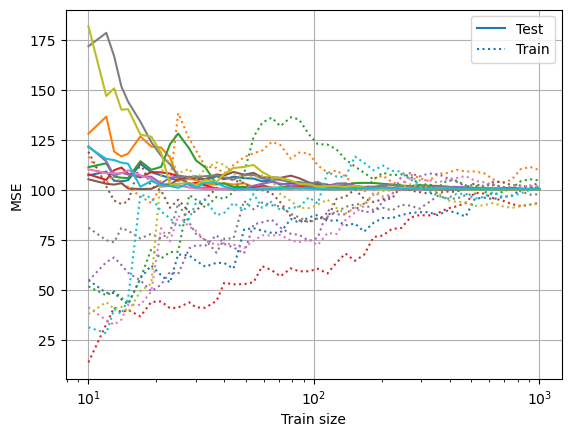

In [39]:
train_sizes = np.geomspace(10, 1000, 50).astype(int)
train_errors = np.zeros(len(train_sizes))
test_errors = np.zeros(len(train_sizes))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for r in range(10):
    X_train, y_train = gen_data(n_samples=train_sizes[-1], random_state=12345+r)
    for i in range(len(train_sizes)):
        model = LinearRegression()
        model.fit(X_train[:train_sizes[i]], y_train[:train_sizes[i]])
        y_train_pred = model.predict(X_train[:train_sizes[i]])
        y_test_pred = model.predict(X_test)
        train_errors[i] = mean_squared_error(y_train[:train_sizes[i]], y_train_pred[:train_sizes[i]])
        test_errors[i] = mean_squared_error(y_test, y_test_pred)
    plt.plot(train_sizes, test_errors, '-', color=colors[r], label='Test' if r==0 else None);
    plt.plot(train_sizes, train_errors, ':', color=colors[r], label='Train' if r==0 else None);
plt.xlabel('Train size');
plt.ylabel('MSE');
plt.legend();
plt.xscale('log');
plt.grid();

- O overfitting se reduz à medida que o número de amostras de treinamento aumenta.

## 2. Regressão linear múltipla

**Múltipla**: múltiplos atributos (n>1)

O exemplo a seguir é retirado do livro do [*An Introduction to Statistical Learning*](https://www.statlearning.com). Como descrito no Cap. 2, os dados consistem no total de vendas de um produto (em milhares de unidades), junto com seu orçamento de publicidade (em milhares de dólares) para três meios de comunicação diferentes (TV, rádio e jornal), em 200 localidades. A variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [41]:
import pandas as pd
df = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)
#df = pd.read_csv('https://github.com/danilo-silva-ufsc/ml-course/raw/master/data/Advertising.csv', index_col=0) # mirror in case the above link fails
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Análise exploratória

1. Trace o histograma de cada uma das 4 variáveis (colunas da tabela).
1. Calcule a matriz de correlação entre as variáveis, utilizando a função `pd.DataFrame.corr`.
1. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um gráfico de dispersão (*scatter plot*), i.e., trace apenas os marcadores, não linhas.
1. O que já se pode afirmar sobre os dados a partir dessa análise exploratória?

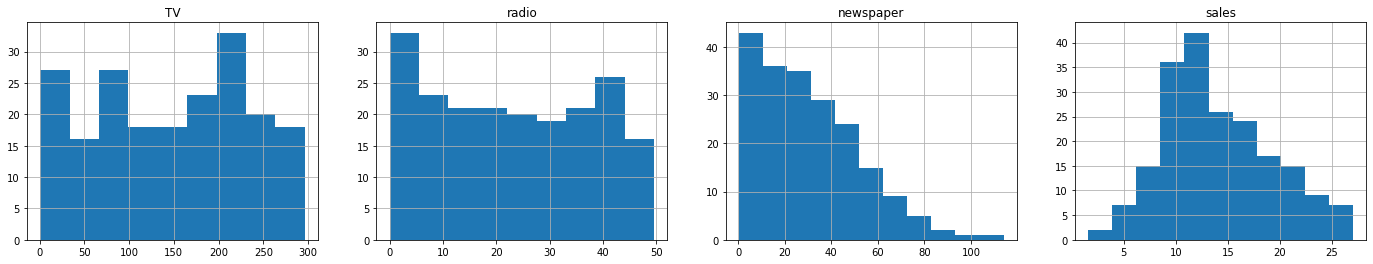

In [42]:
plt.figure(figsize=(24,4))
for i, c in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    plt.hist(df[c], bins='auto')
    plt.title(c)
    plt.grid()

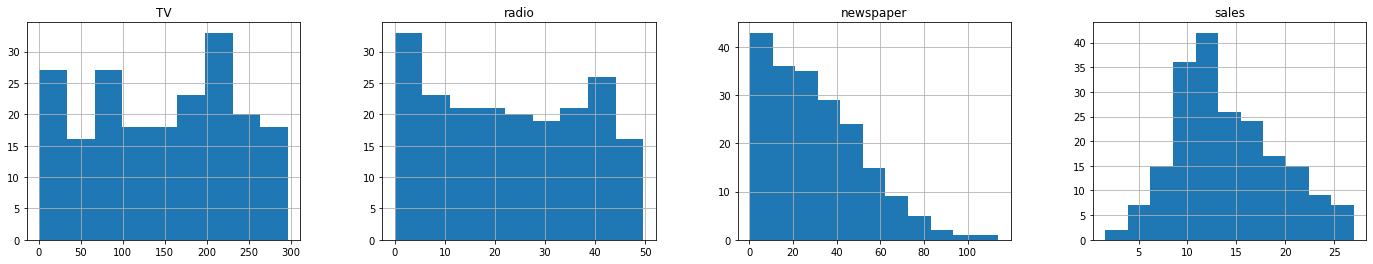

In [43]:
df.hist(bins='auto', layout=(1,4), figsize=(24,4));

In [44]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


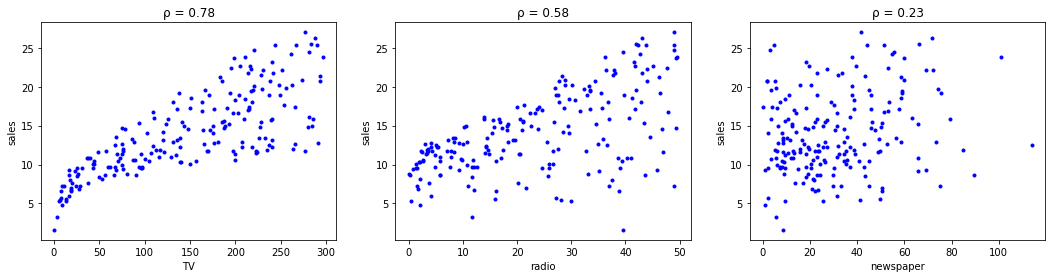

In [45]:
plt.figure(figsize=(18,4))
for i, c in enumerate(df.columns[:-1]):
    plt.subplot(1, 3, i+1)
    plt.plot(df[c], df[df.columns[-1]], 'b.')
    plt.xlabel(c)
    plt.ylabel(df.columns[-1])
    plt.title(f'ρ = {df.corr().loc[c, df.columns[-1]]:.2}')

### Treinamento, avaliação e interpretação

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$.
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `sklearn.model_selection.train_test_split`.
1. Treine um modelo de regressão linear sobre o conjunto de treinamento e calcule o RMSE da predição sobre o conjunto de treinamento e sobre o conjunto de teste.
1. Trace um gráfico de dispersão da predição em função do valor-alvo (sobreponha ao gráfico do valor-alvo em função dele mesmo para fins de comparação), tanto no conjunto de treinamento quanto no conjunto de teste.
1. Analise o vetor de pesos do modelo treinado e identifique os atributos mais importantes.

In [46]:
X = df[['TV', 'radio', 'newspaper']].to_numpy()
y = df['sales'].to_numpy()
print(X.shape, y.shape)

(200, 3) (200,)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20212)
X, y = None, None

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


**Exercício em sala:** resolva o item 7.

<details><summary>Solução</summary>

```python
model = LinearRegression()
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));
```
</details>

In [48]:
???

Train RMSE: 1.7137894780304226
 Test RMSE: 1.491367538489396


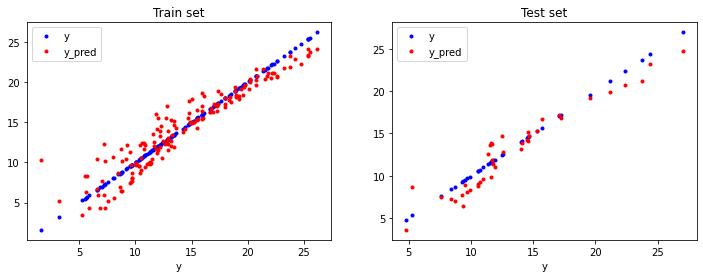

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Train set');
plt.plot(y_train, y_train, 'b.', label='y');
plt.plot(y_train, model.predict(X_train), 'r.', label='y_pred');
plt.xlabel('y')
plt.legend();
plt.subplot(1,2,2)
plt.title('Test set');
plt.plot(y_test, y_test, 'b.', label='y');
plt.plot(y_test, model.predict(X_test), 'r.', label='y_pred');
plt.xlabel('y')
plt.legend();

In [ ]:
# y_pred = b  +  w1 * tv  +  w2 * radio  +  w3 * newspaper

In [50]:
model.coef_

array([ 0.04624071,  0.18956263, -0.00175866])

In [51]:
model.coef_ * X_train.std(axis=0)

array([ 4.06531299,  2.75360839, -0.03938707])

## 3. Regressão polinomial

In [52]:
def gen_data(n_samples, random_state):
    rng = np.random.RandomState(random_state)
    x = np.linspace(0, 1, n_samples)
    y = 50*np.cos(4*np.pi*x) + 10*rng.standard_normal(size=n_samples)
    X = x.reshape(-1, 1)
    return X, y

(20, 1) (100000, 1) (100000, 1)


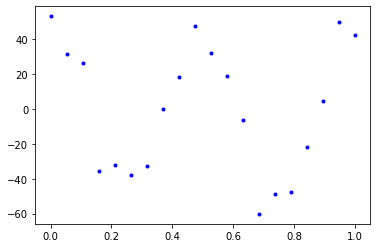

In [53]:
X_train, y_train = gen_data(20, random_state=110)
X_val, y_val = gen_data(100000, random_state=2)
X_test, y_test = gen_data(100000, random_state=5)
print(X_train.shape, X_val.shape, X_test.shape)

# Plot only the training data!
plt.plot(X_train, y_train, 'b.');

Train RMSE: 36.31891699896961
 Test RMSE: 36.807458204075274


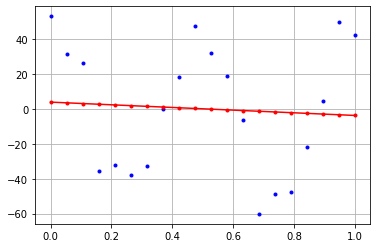

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));
plt.plot(X_train, y_train, 'b.');
plt.plot(X_train, model.predict(X_train), 'r.-');
plt.grid();

In [55]:
# Constant baseline
print('Train RMSE (const):', y_train.std());
print(' Test RMSE (const):', root_mean_squared_error(y_test, np.full(y_test.shape, y_train.mean())));

Train RMSE (const): 36.3931448782568
 Test RMSE (const): 36.74133370805903


### Adicionando atributos polinomiais

Exemplo para $d = 3$:

- $(x_1) \mapsto (1,\; x_1,\; x_1^2,\; x_1^3)$

- $(x_1,\; x_2) \mapsto (1,\; x_1,\; x_2,\; x_1^2,\; x_1x_2,\; x_2^2,\; x_1^3,\; x_1^2x_2,\; x_1x_2^2,\; x_2^3)$

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
print(poly.fit_transform([[2, 10]]))

poly = PolynomialFeatures(degree=3)
print(poly.fit_transform([[2, 10]]))

poly = PolynomialFeatures(degree=1, include_bias=False)
print(poly.fit_transform([[2, 10]]))

[[  1.   2.  10.   4.  20. 100.]]
[[   1.    2.   10.    4.   20.  100.    8.   40.  200. 1000.]]
[[ 2. 10.]]


**Abordagem 1**: Pré-processamento **separado** do modelo de aprendizado

Train RMSE: 33.34266798963167
 Test RMSE: 36.14998537976188


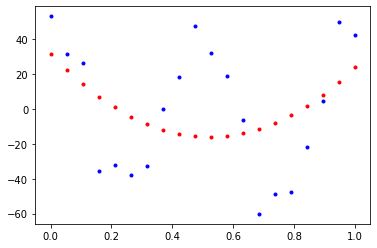

In [57]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_transformed = poly.fit_transform(X_train) # fit and transform
X_test_transformed = poly.transform(X_test)       # don't fit, just transform!

model = LinearRegression()
model.fit(X_train_transformed, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train_transformed)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test_transformed)));
plt.plot(X_train, y_train, 'b.');
plt.plot(X_train, model.predict(X_train_transformed), 'r.');

**Abordagem 2**: Pré-processamento **integrado** ao modelo de aprendizado

- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
- https://scikit-learn.org/stable/getting_started.html
- https://scikit-learn.org/stable/modules/compose.html

Train RMSE: 33.34266798963167
 Test RMSE: 36.14998537976188


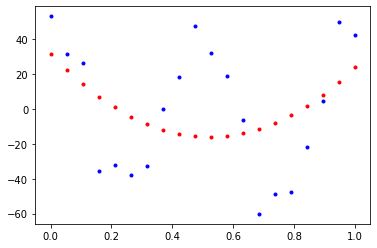

In [58]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));
plt.plot(X_train, y_train, 'b.');
plt.plot(X_train, model.predict(X_train), 'r.');

In [59]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [60]:
list(model)

[PolynomialFeatures(include_bias=False), LinearRegression()]

In [61]:
model[0]

PolynomialFeatures(include_bias=False)

In [62]:
model[1]

LinearRegression()

In [63]:
b = model[-1].intercept_
w = model[-1].coef_
print(f'b = {b}, w = {w}')

b = 31.694464994111062, w = [-183.09987747  175.44488915]


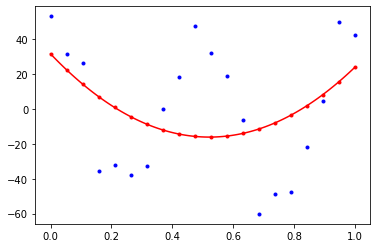

In [64]:
def plot_data(X, y, model=None, n_points=100):
    plt.plot(X, y, 'b.');
    if model is not None:
        plt.plot(X, model.predict(X), 'r.')
        XX = np.linspace(X.min(), X.max(), n_points).reshape(-1, 1)
        plt.plot(XX, model.predict(XX), 'r-')
    return

plot_data(X_train, y_train, model)

**Otimização de hiperparâmetros**

- O grau `d` é um **hiperparâmetro**
- O conjunto de teste só deve ser usado depois de todos os hiperparâmetros terem sido escolhidos
- Por isso, a partir de agora usaremos um **conjunto de validação**
- Hiperparâmetros são otimizados de forma a maximizar o desempenho de validação

In [65]:
# if you get an error, run: pip install -U ipywidgets

from ipywidgets import interact
@interact(d=(1, 20))
def _(d=1):
    model = make_pipeline(PolynomialFeatures(d, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    plot_data(X_train, y_train, model)
    print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
    print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)));

interactive(children=(IntSlider(value=1, description='d', max=20, min=1), Output()), _dom_classes=('widget-int…

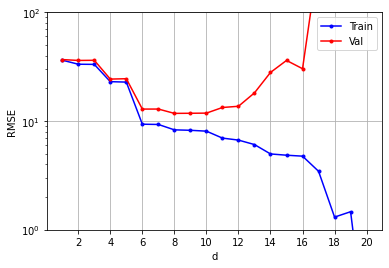

In [66]:
ds = np.arange(1, 21)
train_errors = np.zeros(len(ds))
val_errors = np.zeros(len(ds))
for i in range(len(ds)):
    model = make_pipeline(PolynomialFeatures(ds[i], include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    train_errors[i] = root_mean_squared_error(y_train, model.predict(X_train))
    val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
plt.plot(ds, train_errors, 'b.-', label='Train')
plt.plot(ds, val_errors, 'r.-', label='Val')
plt.xlabel('d')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.yscale('log');
plt.xticks(ds[1::2])
plt.ylim([1, 100]);

d = 8
Train RMSE: 8.30508914071028
  Val RMSE: 11.771318050508413
 Test RMSE: 11.827359956318167


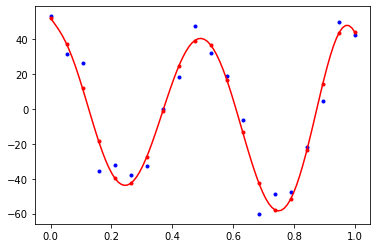

In [67]:
d = ds[val_errors.argmin()]
print('d =', d)
model = make_pipeline(PolynomialFeatures(d, include_bias=False), LinearRegression())
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));

### Regularização

- Regressão linear com regularização $\ell_2$ também é conhecida como **ridge regression**
- O uso de regularização introduz mais um hiperparâmetro: o parâmetro de regularização $\lambda$
- No modelo `Ridge` do sklearn, o parâmetro de regularização é denominado `alpha` (ao invés de $\lambda$)
- É recomendável variar $\lambda$ em uma escala logarítmica (e tipicamente $\lambda \ll 1$)
- Não utilize `lambda` como nome de variável, pois no Python `lambda` é uma palavra reservada (operador para criar funções anônimas). Uma sugestão é abreviar para `lamb`.

In [68]:
from ipywidgets import FloatLogSlider
from sklearn.linear_model import Ridge
d = 14
@interact(lamb=FloatLogSlider(1e-24, min=-30, max=3, step=0.5, readout_format='.2e'))
def _(lamb):
    model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lamb))
    model.fit(X_train, y_train)
    b = model[-1].intercept_
    w = model[-1].coef_
    plot_data(X_train, y_train, model)
    print(f'      λ = {lamb:#.2e}\n')
    print(f'||w||^2 = {np.sum(w**2):#.2e}\n')
    print('Train MSE: %f' % root_mean_squared_error(y_train, model.predict(X_train)));
    print('  Val MSE: %f' % root_mean_squared_error(y_val, model.predict(X_val)));

interactive(children=(FloatLogSlider(value=1e-24, description='lamb', max=3.0, min=-30.0, readout_format='.2e'…

C:\Users\Danilo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.95967e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Danilo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.98965e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Danilo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.08732e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


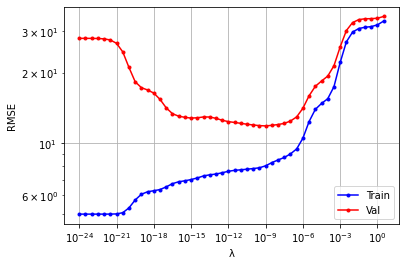

In [69]:
d = 14
lambs = 10**np.arange(-24, 1, 0.5)
train_errors = np.zeros(len(lambs))
val_errors = np.zeros(len(lambs))
for i in range(len(lambs)):
    model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lambs[i]))
    model.fit(X_train, y_train)
    train_errors[i] = root_mean_squared_error(y_train, model.predict(X_train))
    val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
plt.plot(lambs, train_errors, 'b.-', label='Train')
plt.plot(lambs, val_errors, 'r.-', label='Val')
plt.xlabel('λ')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xticks(lambs[::6]);

d = 14
λ = 1e-09
Train RMSE: 8.012309383887029
  Val RMSE: 11.857331091527517
 Test RMSE: 11.91816676228605


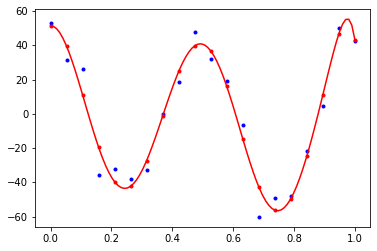

In [70]:
lamb = lambs[val_errors.argmin()]
print('d =', d)
print('λ =', lamb)
model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lamb))
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));

- Uma regularização apropriada é capaz de controlar a complexidade do modelo e assim reduzir o overfitting
- No entanto, regularização elevada tende a causar underfitting

In [71]:
# Searching for the best regularization parameter for a given degree

def search_regularization(d):
    # Requires: X_train, y_train, X_val, y_val
    lambs = 10**np.arange(-24, 1, 0.5)
    val_errors = np.zeros(len(lambs))
    for i in range(len(lambs)):
        model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lambs[i]))
        model.fit(X_train, y_train)
        val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
    lamb = lambs[val_errors.argmin()]
    return lamb

In [72]:
%%time
import warnings
warnings.filterwarnings('ignore', 'Ill-conditioned matrix')
ds = np.arange(1, 21)
lambs = np.zeros(len(ds))
train_errors = np.zeros(len(ds))
val_errors = np.zeros(len(ds))
for i in range(len(ds)):
    lambs[i] = search_regularization(ds[i])
    model = make_pipeline(PolynomialFeatures(ds[i], include_bias=False), Ridge(lambs[i]))
    model.fit(X_train, y_train)
    train_errors[i] = root_mean_squared_error(y_train, model.predict(X_train))
    val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
warnings.filterwarnings('default', 'Ill-conditioned matrix')

Wall time: 14.2 s


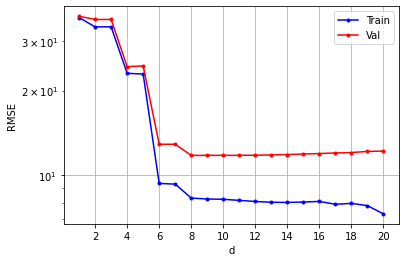

d = 8
λ = 1e-24
Train RMSE: 8.305089140693054
  Val RMSE: 11.771318082119768
 Test RMSE: 11.827359987912175


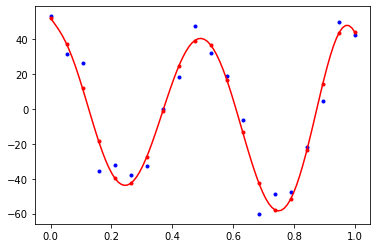

In [73]:
plt.plot(ds, train_errors, 'b.-', label='Train')
plt.plot(ds, val_errors, 'r.-', label='Val')
plt.xlabel('d')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.yscale('log');
plt.xticks(ds[1::2]);
plt.show()
i = val_errors.argmin()
d = ds[i]
lamb = lambs[i]
print('d =', d)
print('λ =', lamb)
model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lamb))
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));

### Extração de atributos customizada

b = 1.5709341716352088, w = [-7.65498832 48.43412441]
Train RMSE: 9.661758597138254
  Val RMSE: 10.55339228654486


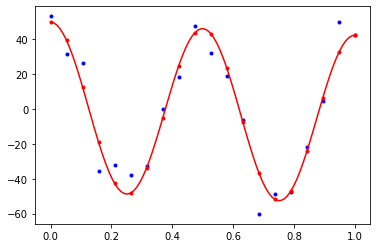

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_new = np.c_[X, np.cos(4*np.pi*X)]
        return X_new

model = make_pipeline(CustomFeatures(), LinearRegression())
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print(f'b = {model[-1].intercept_}, w = {model[-1].coef_}')
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)));
#print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));